In [1]:
import pandas as pd

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [45]:
%config InlineBackend.figure_format = 'retina'

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import statsmodels.api as sm

In [170]:
from datetime import datetime

In [173]:
# Another REF
# https://www.kaggle.com/code/harshjain123/time-series-arima-sarima/notebook

## Loading Dataset & Filtering

In [49]:
df = pd.read_csv("pedidos_magalu.csv", sep=',', date_parser='data')

In [50]:
df['data'] = pd.to_datetime(df['data'])

In [51]:
df.columns = ['date', 'orders']

## Converting to Timeseries

In [52]:
df = df.set_index('date')
timeseries = pd.Series(data=df['orders'])

## Data Health Checking

In [53]:
timeseries.isna().sum()

0

## First Plot

In [ ]:
# # Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
hfont = {'fontname':'Calibri'}

sns.lineplot(data=timeseries, ax=ax, linestyle='-');
plt.title("MGLU - Number of Orders along Time", fontsize=16, fontdict=dict(weight='bold'), **hfont)
ax.set_xlabel("Date", fontsize=12, fontdict=dict(weight='bold'), **hfont);
ax.set_ylabel("#Orders", fontsize=12, fontdict=dict(weight='bold'), **hfont);
ax.grid()


fig, ax = plt.subplots(nrows=1, figsize = (15,18))

fit = sm.tsa.STL(timeseries).fit()

original_ts = timeseries.copy()
predicted_ts = fitted_model.predict()
residuals = fitted_model.resid

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
ax.grid(linestyle='--', alpha=0.3);
ax.set_title("MGLU - Number of Orders along time", fontsize=20);

## Mutianual Stacked Plot

In [55]:
# !Deprecated
bianual_timeseries = (
    timeseries[(timeseries.index >= datetime(year=1998, month=1, day=1)) & 
               (timeseries.index <= datetime(year=2000, month=1, day=1))
              ]
)

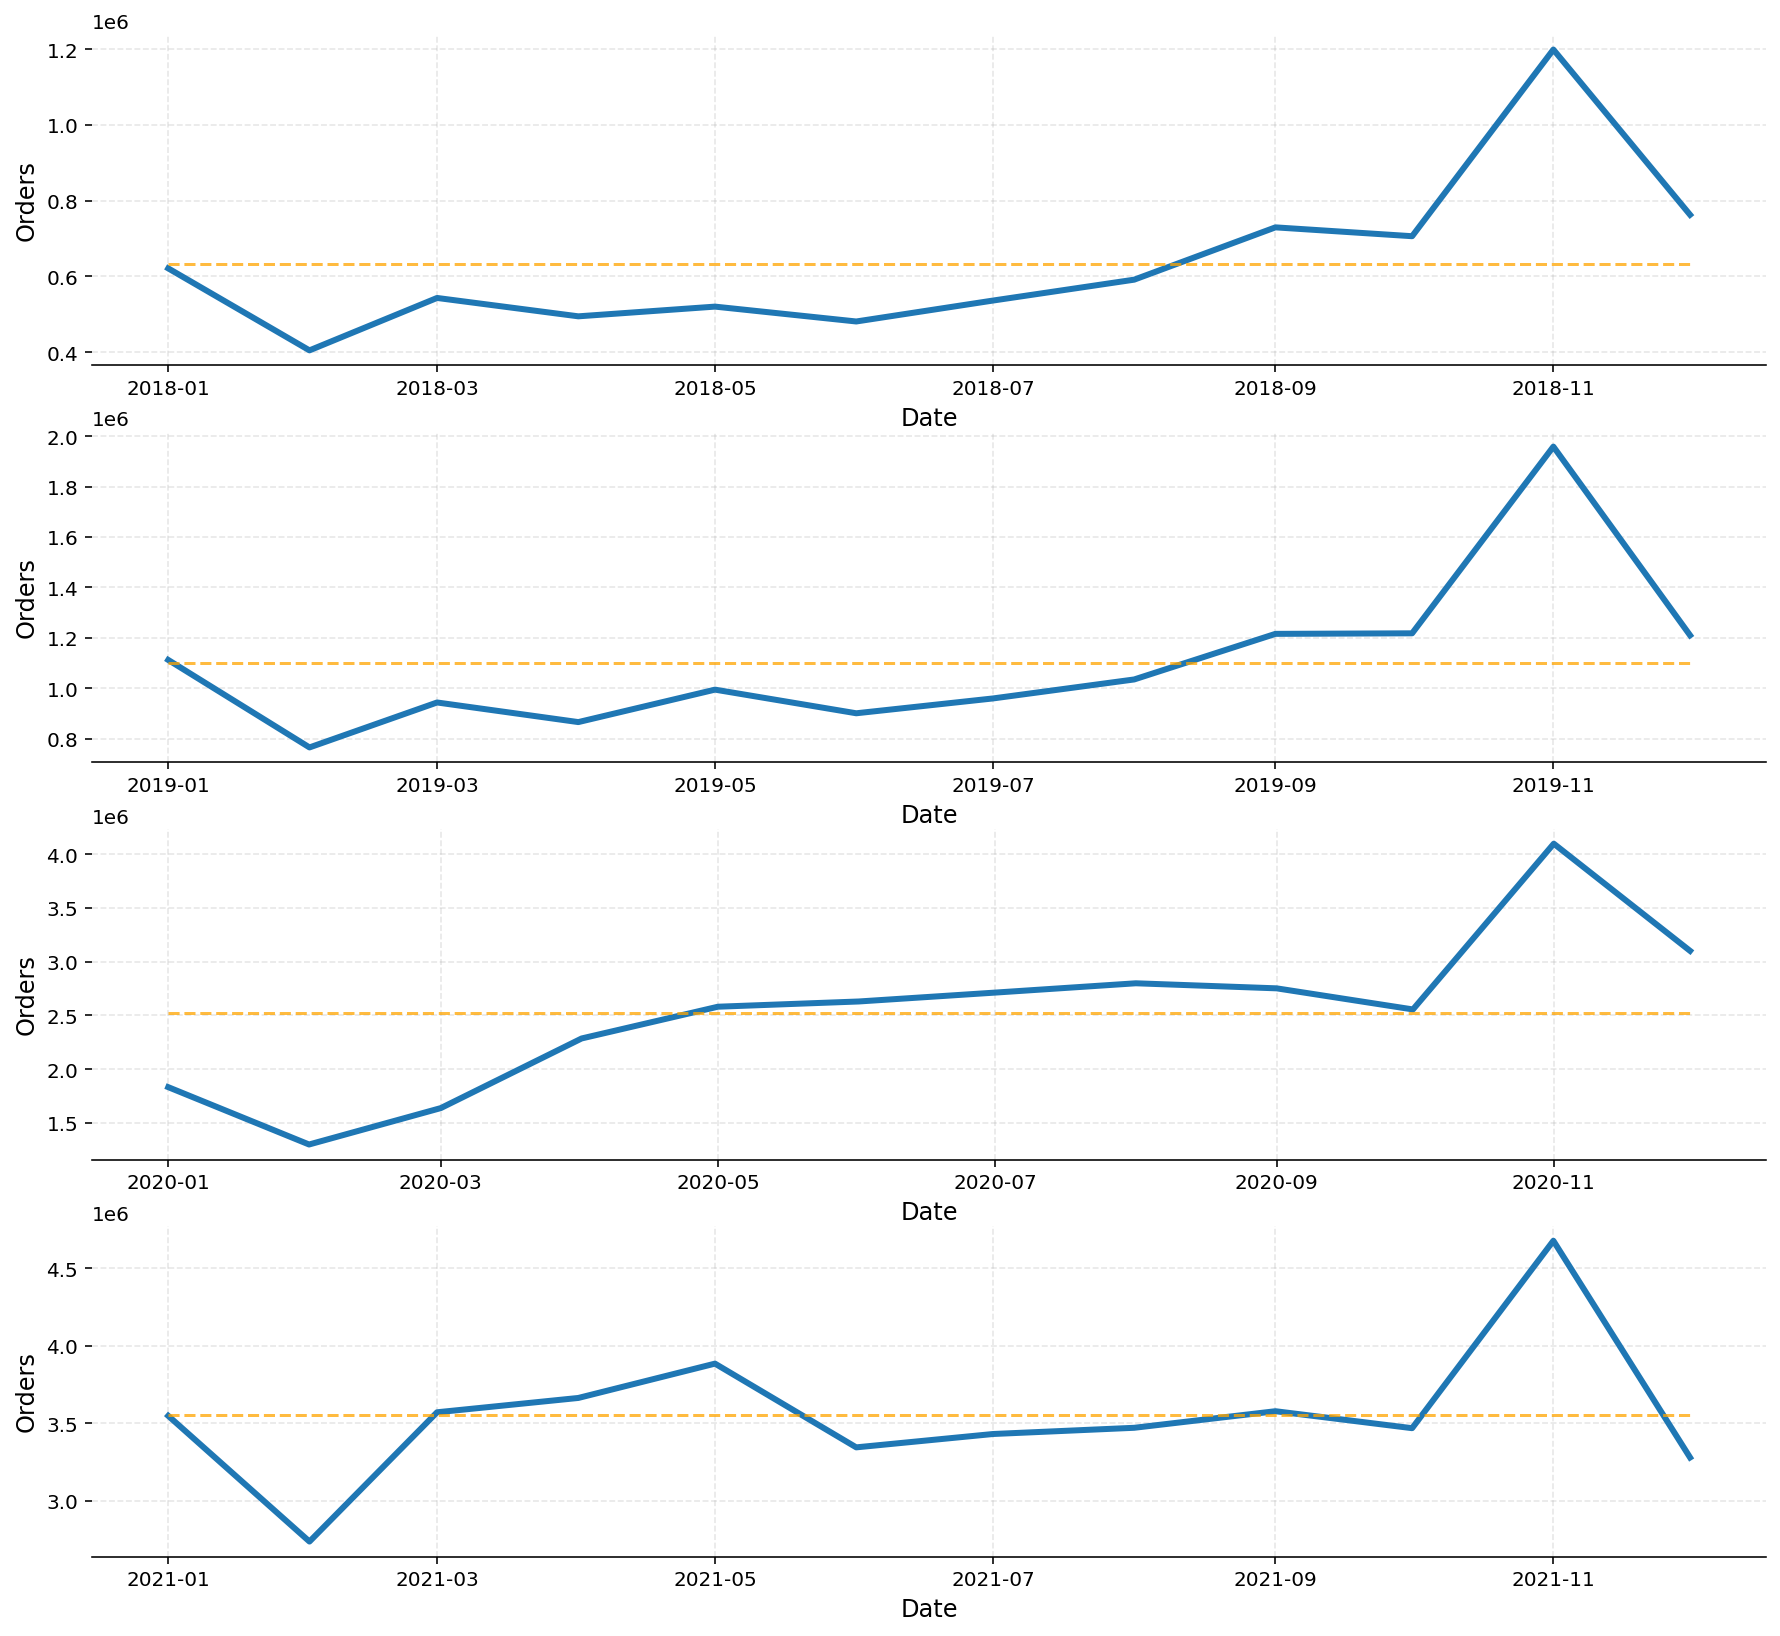

In [109]:
years = timeseries.index.year.unique().values

years = [2018, 2019, 2020, 2021]

fig, ax = plt.subplots(nrows=len(years), figsize = (15,14))

for i, y in enumerate(years):
    d = timeseries[(timeseries.index.year == y)]

    fit = sm.tsa.STL(d).fit()
    sns.lineplot(data=d, ax=ax[i], linestyle='-', linewidth=3);
    sns.lineplot(data=fit.trend, ax=ax[i], linestyle='--', alpha=.75, color='orange');
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel("Date", fontsize=12)
    ax[i].set_ylabel("Orders", fontsize=12)
    ax[i].grid(linestyle='--', alpha=0.3);

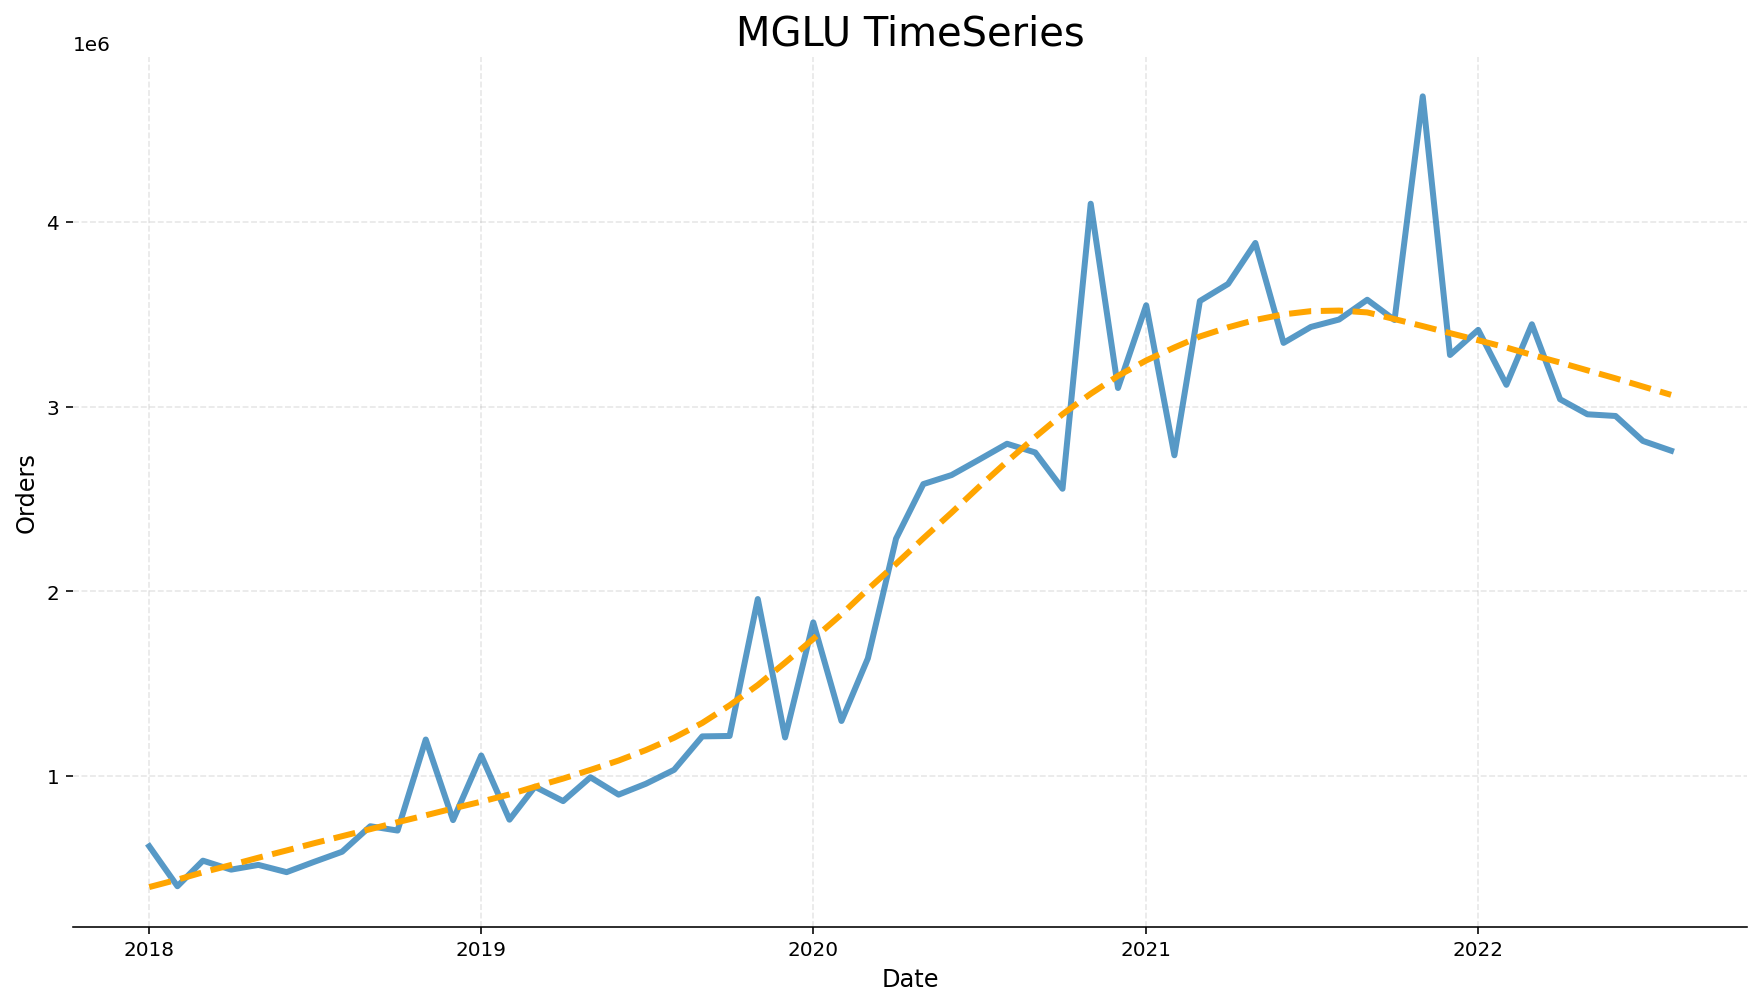

In [77]:
fig, ax = plt.subplots(ncols=1, figsize = (15,8))

fit = sm.tsa.STL(timeseries).fit()

plt.title("MGLU TimeSeries", fontsize=20)
sns.lineplot(data=timeseries, ax=ax, linestyle='-', alpha=.75, linewidth=3);
sns.lineplot(data=fit.trend, ax=ax, linestyle='--', color='orange', linewidth=3);
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
ax.grid(linestyle='--', alpha=0.3);

## Ploting ACF

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

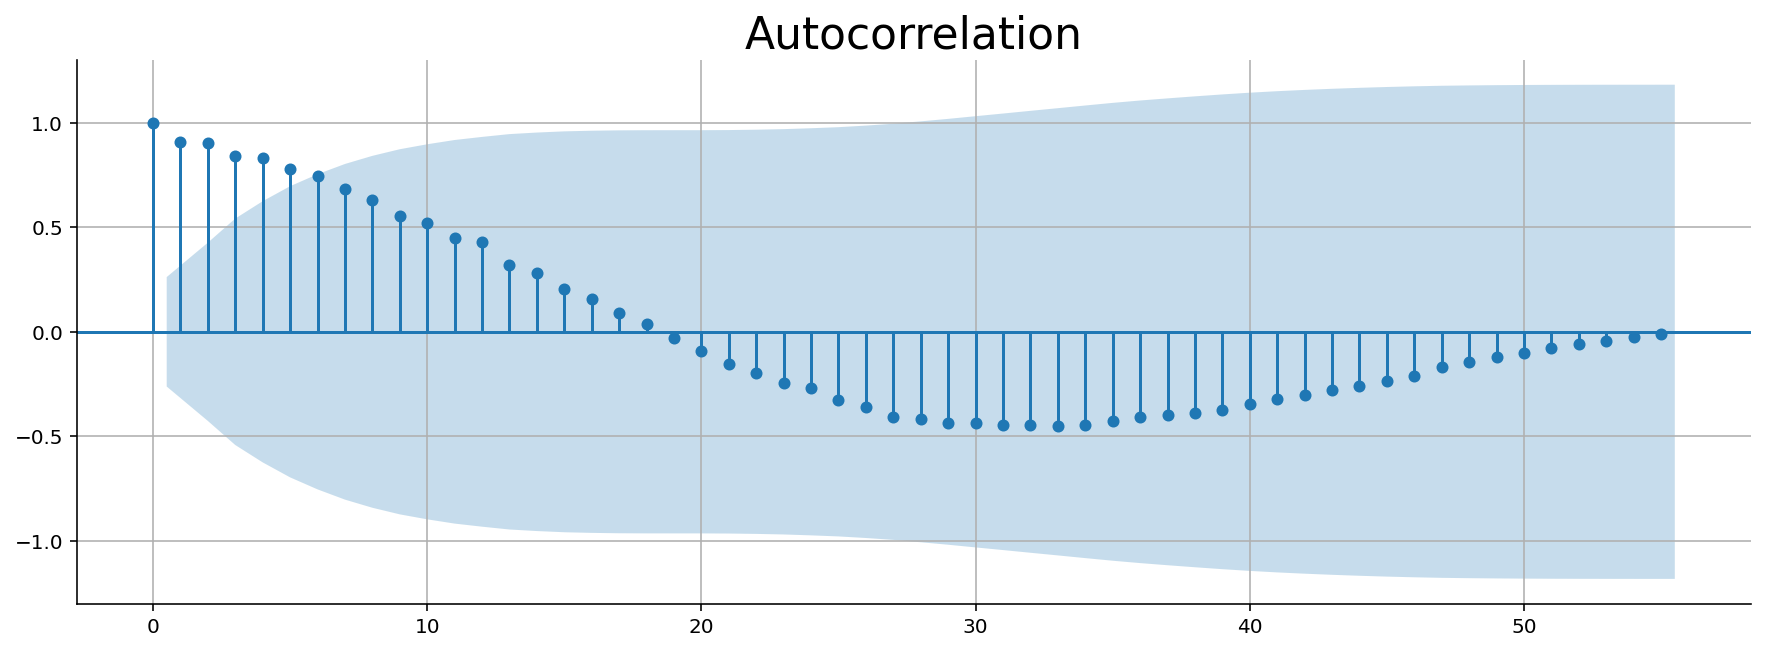

In [86]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_acf(timeseries, lags=55, ax=ax);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Autocorrelation", fontsize=22)
ax.grid()

## Getting the Differences

In [61]:
# Inbuilt function
diff_timeseries = timeseries.diff()

In [62]:
diff_timeseries = diff_timeseries.dropna()

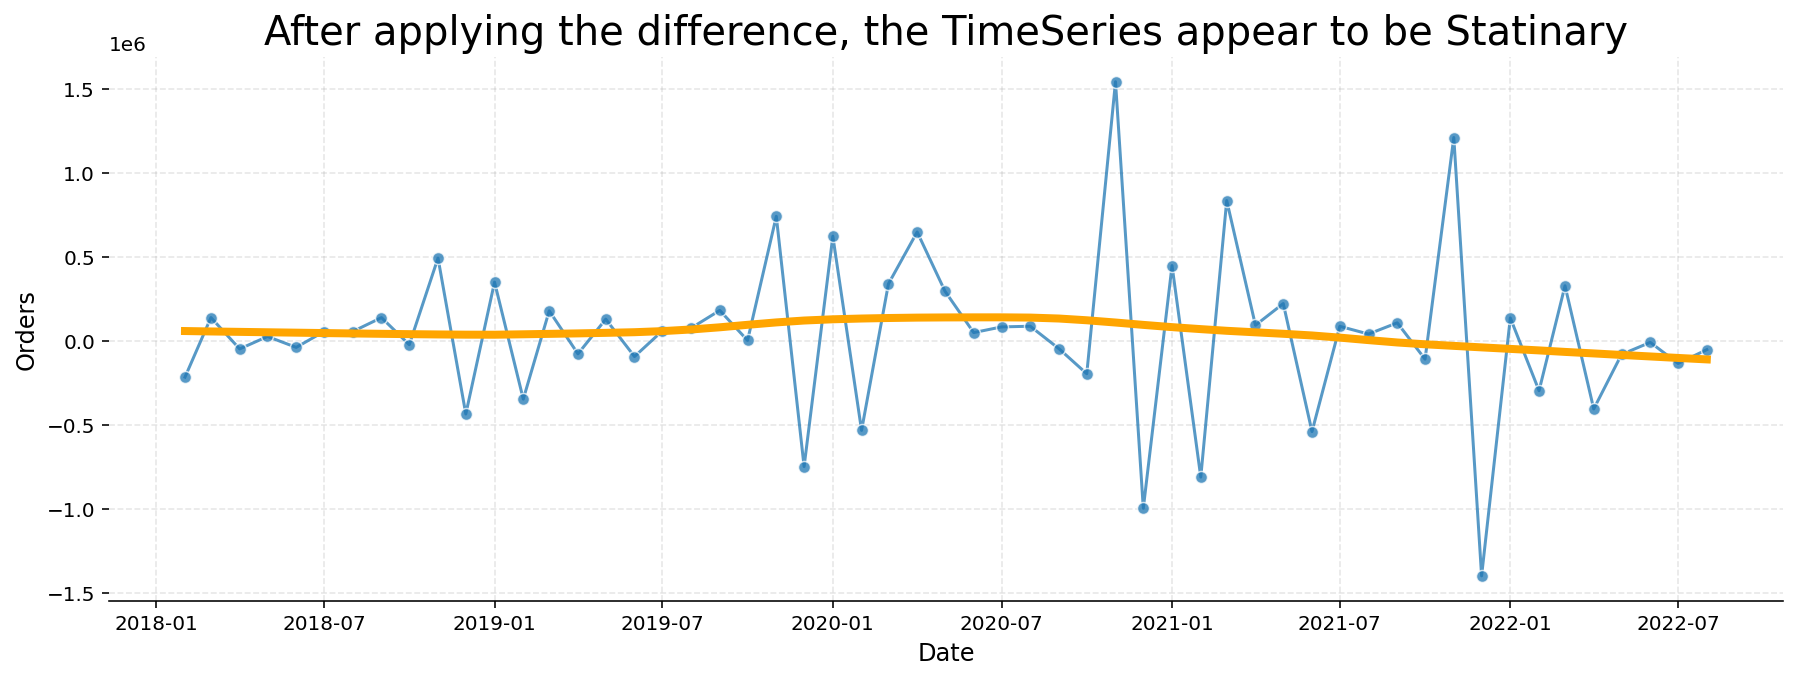

In [87]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))

sns.lineplot(data=diff_timeseries, ax=ax, linestyle='-', alpha=.75, marker='o');

fit = sm.tsa.STL(diff_timeseries).fit()

plt.title("After applying the difference, the TimeSeries appear to be Statinary", fontsize=20)
sns.lineplot(data=fit.trend, ax=ax, linestyle='-', color='orange', linewidth=4);
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
ax.grid(linestyle='--', alpha=0.3);

In [ ]:
# TODO: fix following plots aspect

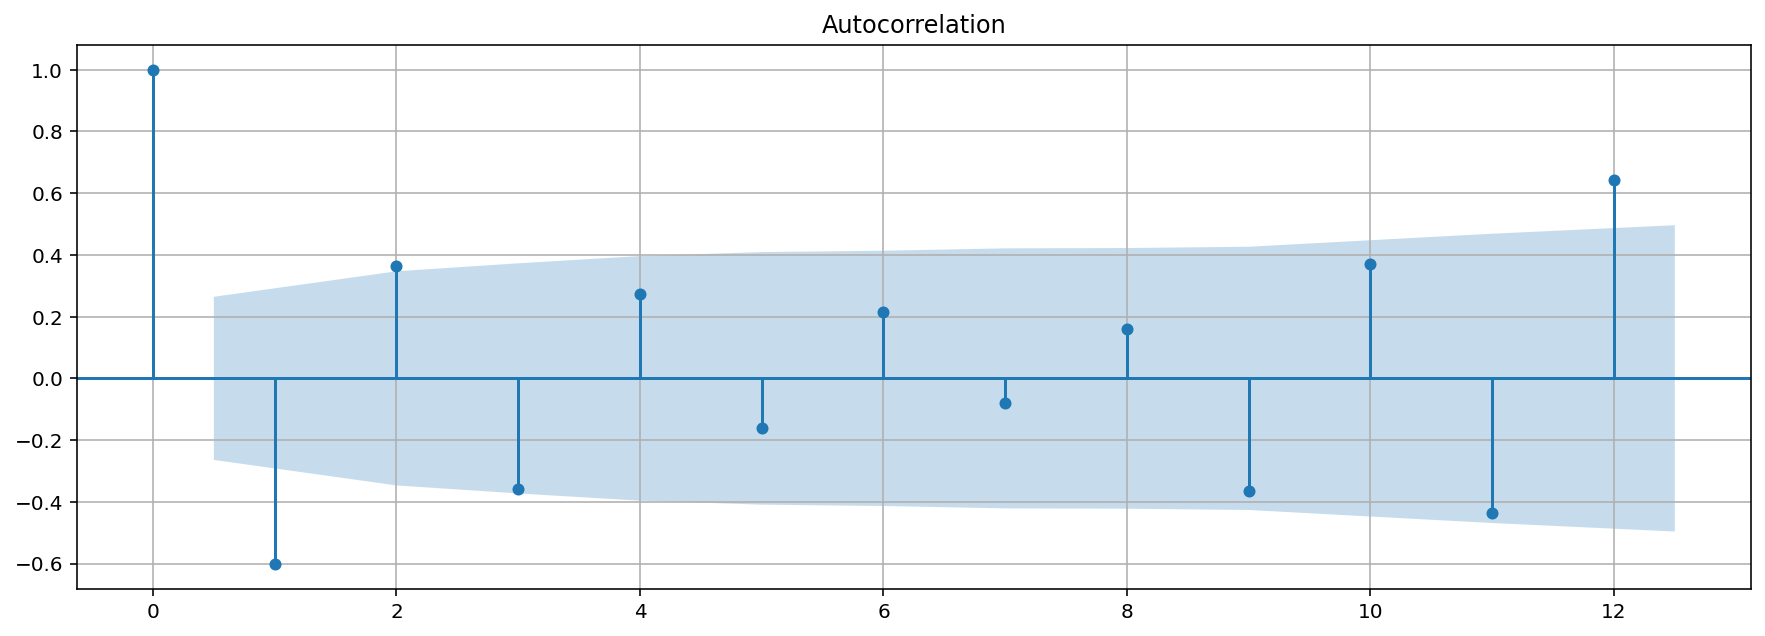

In [88]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_acf(diff_timeseries, lags=12, ax=ax);
ax.grid()

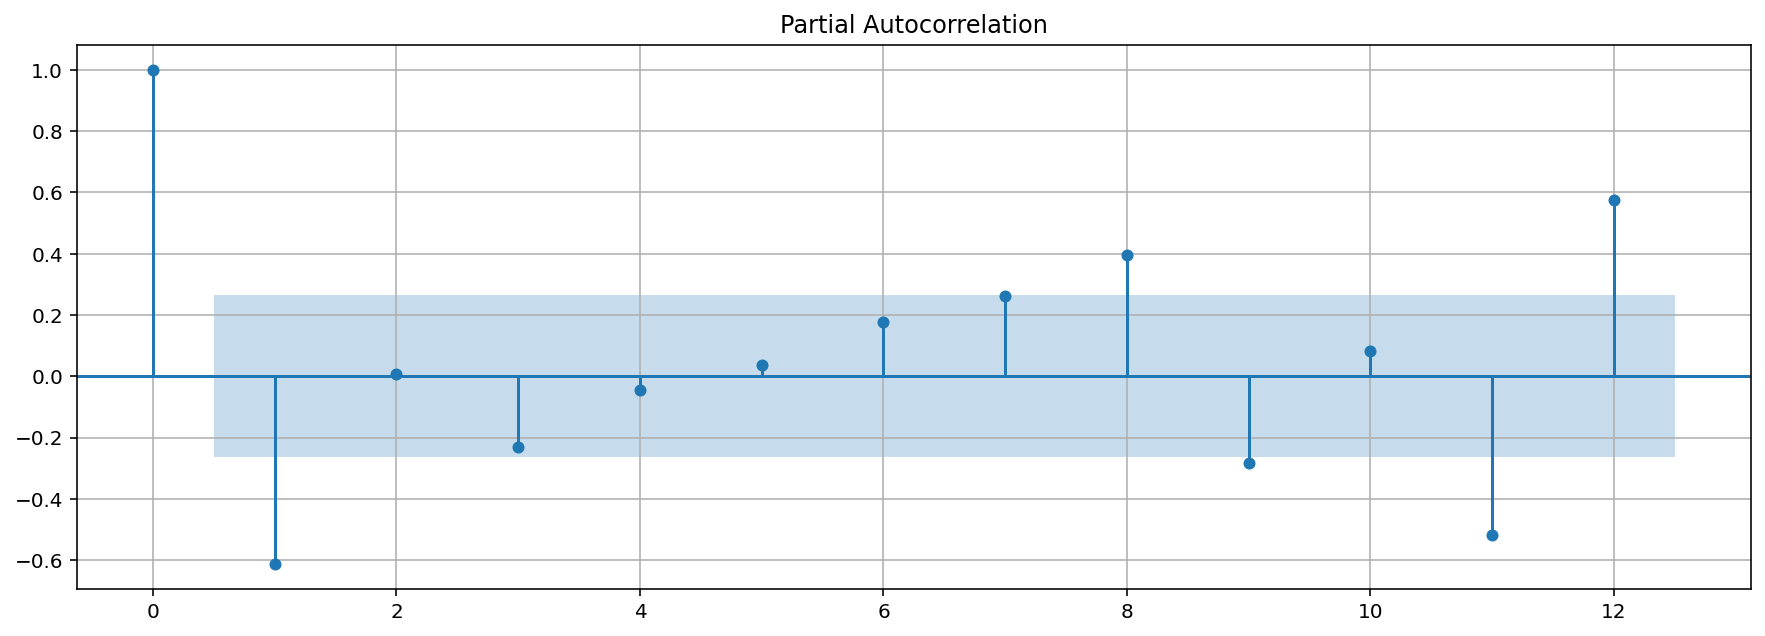

In [89]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_pacf(diff_timeseries, lags=12, ax=ax);
ax.grid()

## Testing Unitary Root - ADF

- **null hypothesis** -> THERE IS A UNIT ROOT
- **alt hypothesis** -> THERE IS A UNIT ROOT

The **null hypothesis** of the Augmented Dickey-Fuller is that there is a unit
root, with the alternative that there is no unit root. If the pvalue is
above a critical size, then we cannot reject that there is a unit root.

In [90]:
# calculate the stationarity of a random walk
from statsmodels.tsa.stattools import adfuller

def adf_testing(s):
    result = adfuller(s)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [91]:
adf_testing(timeseries)

ADF Statistic: -1.091629
p-value: 0.718399
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


    This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

In [92]:
adf_testing(diff_timeseries)

ADF Statistic: -0.267660
p-value: 0.929961
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


    This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

<hr style="height:3px">

# DECOMPOSING

- **LEVEL** The baseline value for the series if it were a straight line.

- **TREND** The optional and often linear increasing or decreasing behavior of the series over
time.

- **SEASONALITY** The optional repeating patterns or cycles of behavior over time.

- **NOISE** The optional variability in the observations that cannot be explained by the
model.


_All time series have a level, most have noise, and the trend and seasonality are optional._

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [206]:
result = seasonal_decompose(timeseries, model='additive', freq=12)

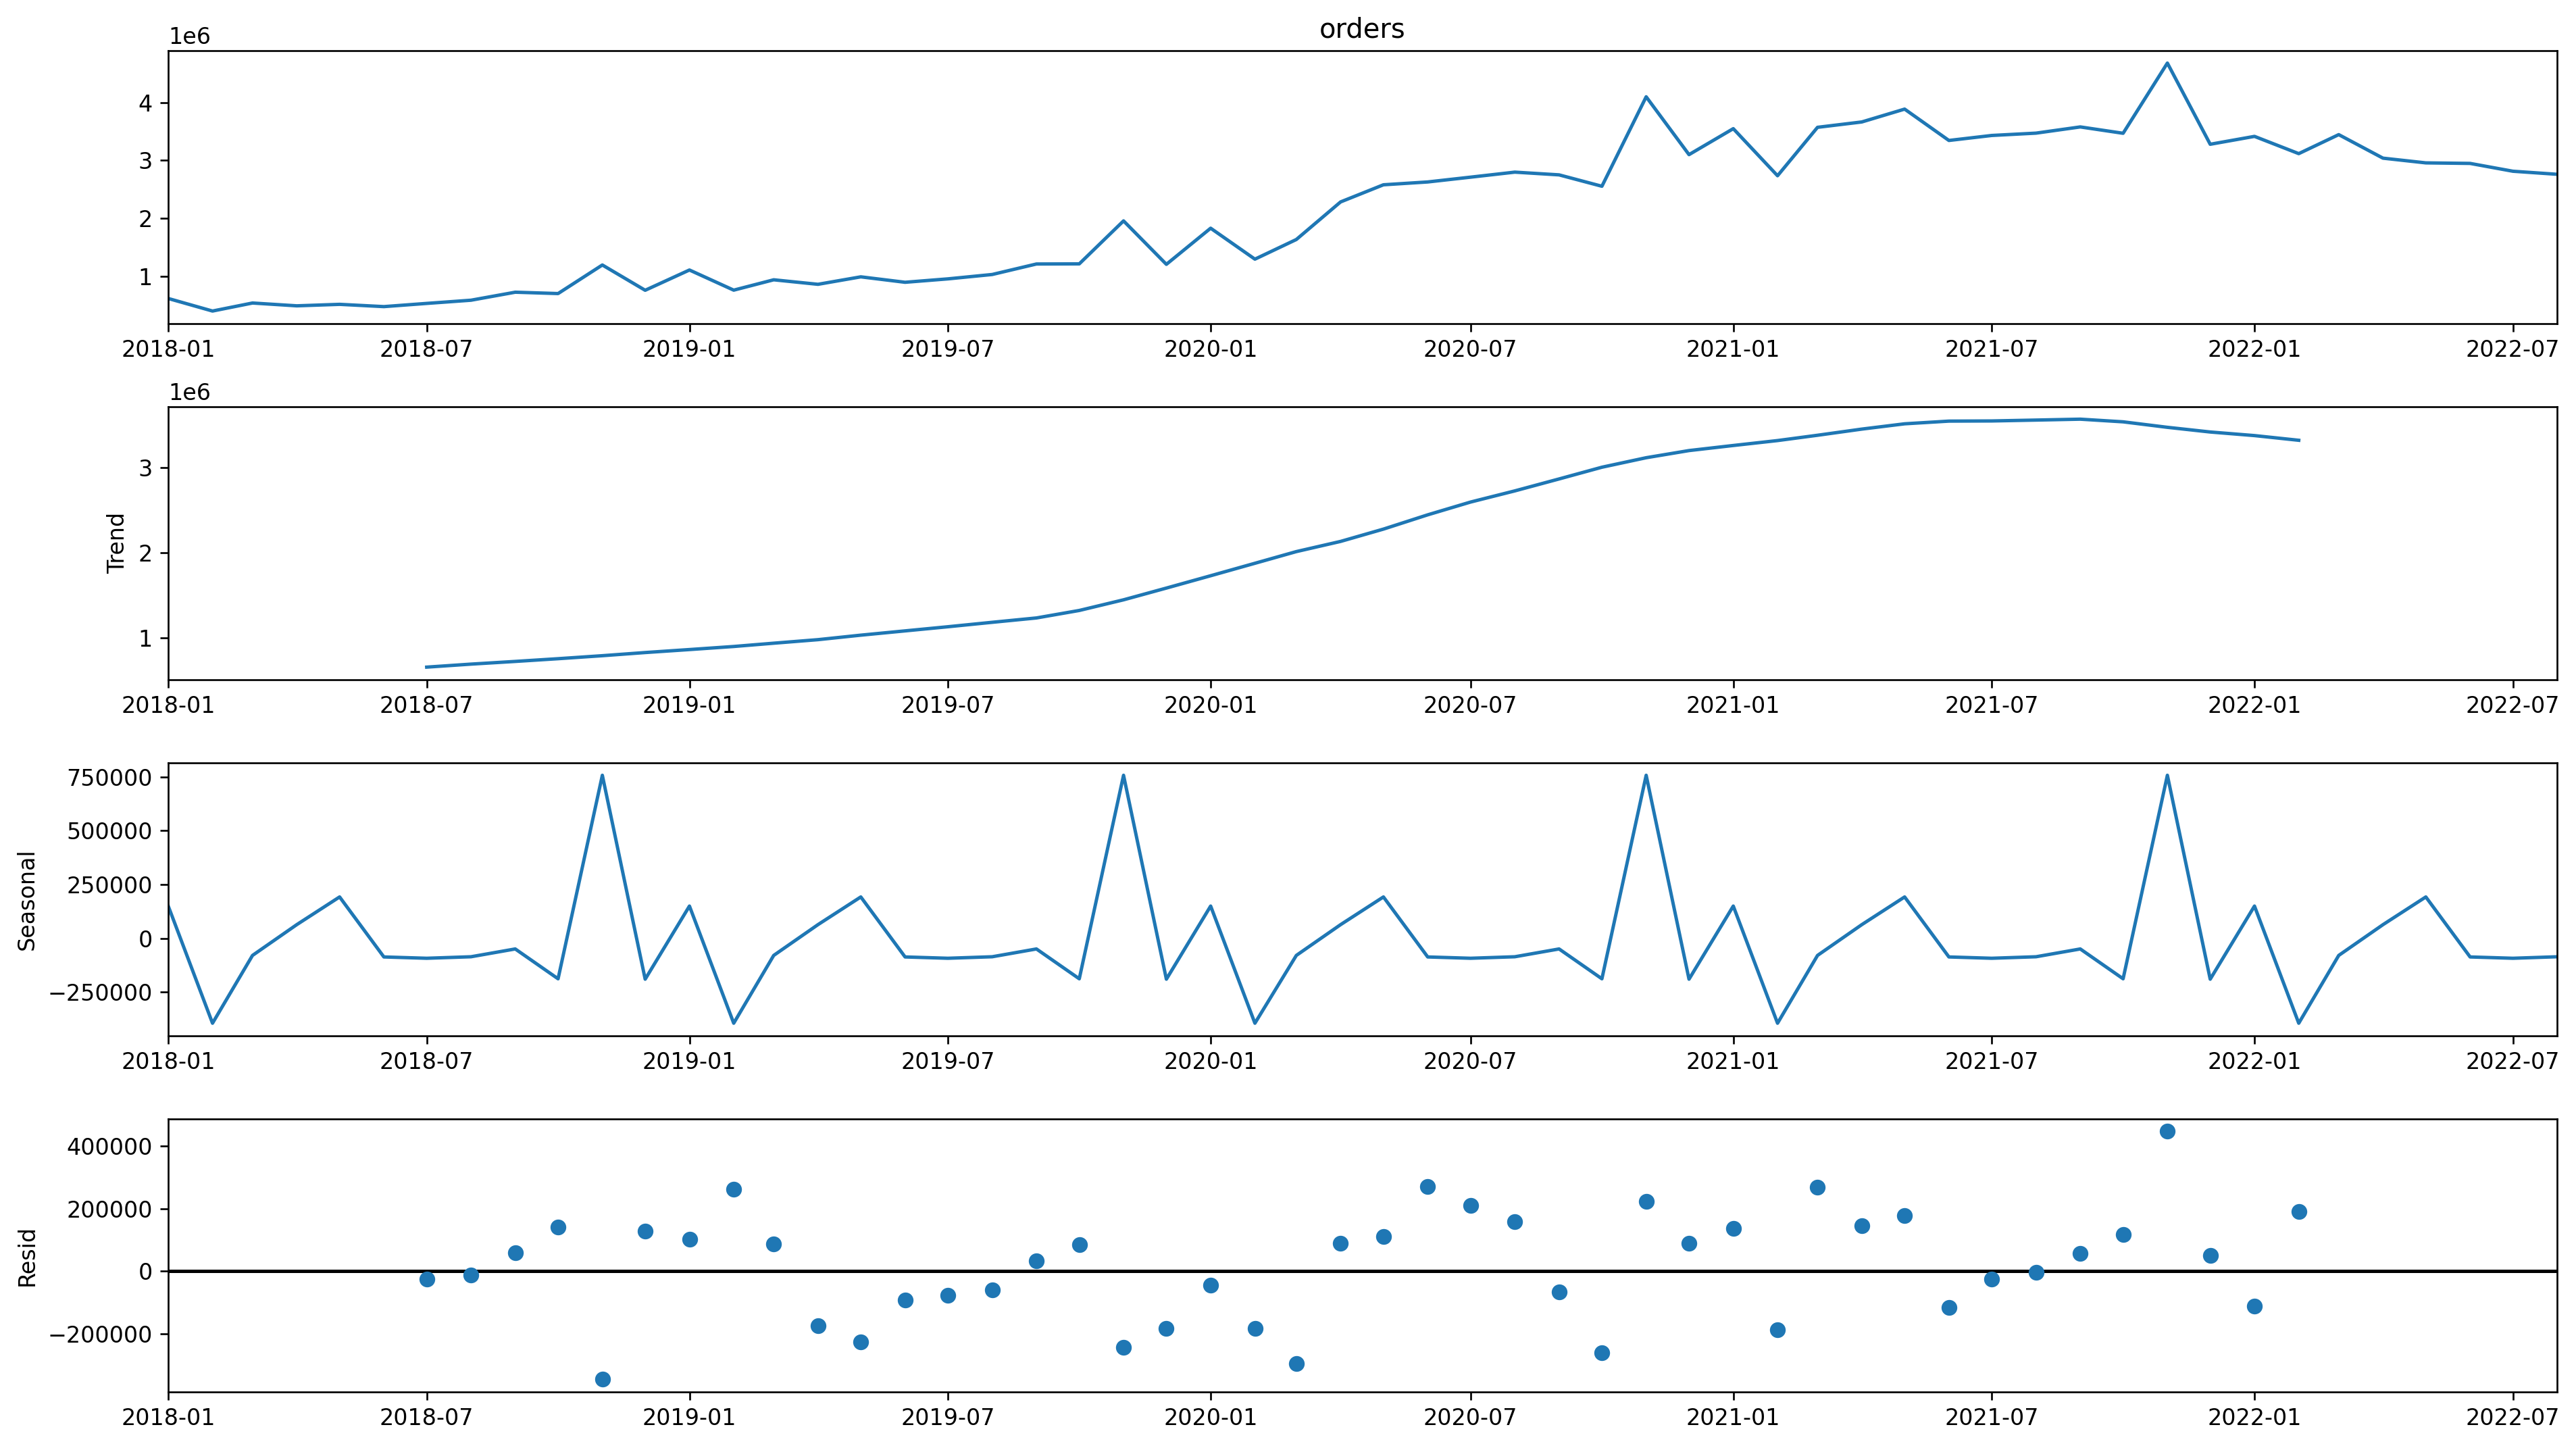

In [209]:
fig = result.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

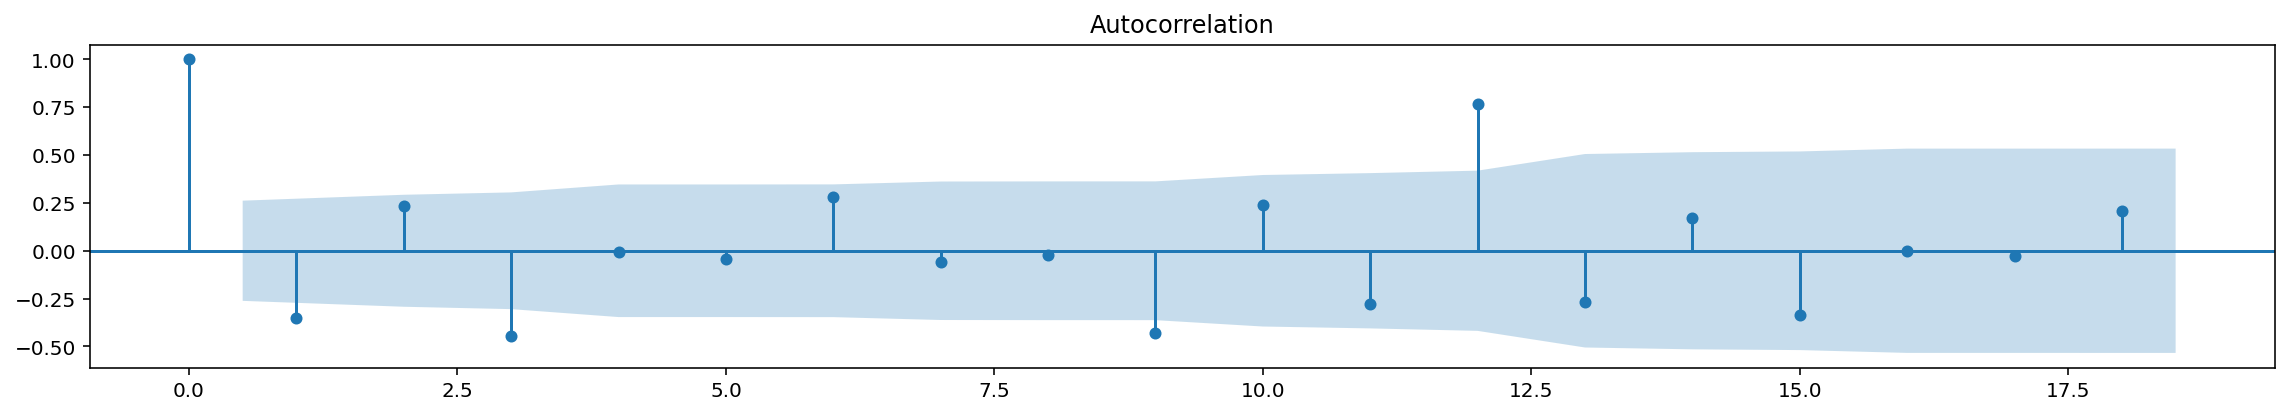

In [150]:
fig = plot_acf(result.seasonal)
fig.set_size_inches((16, 3))
fig.tight_layout()

Easy to notice that the lag[12] high correlation implies in a yearly seazonality

## Original TimeSeries with the differenced one

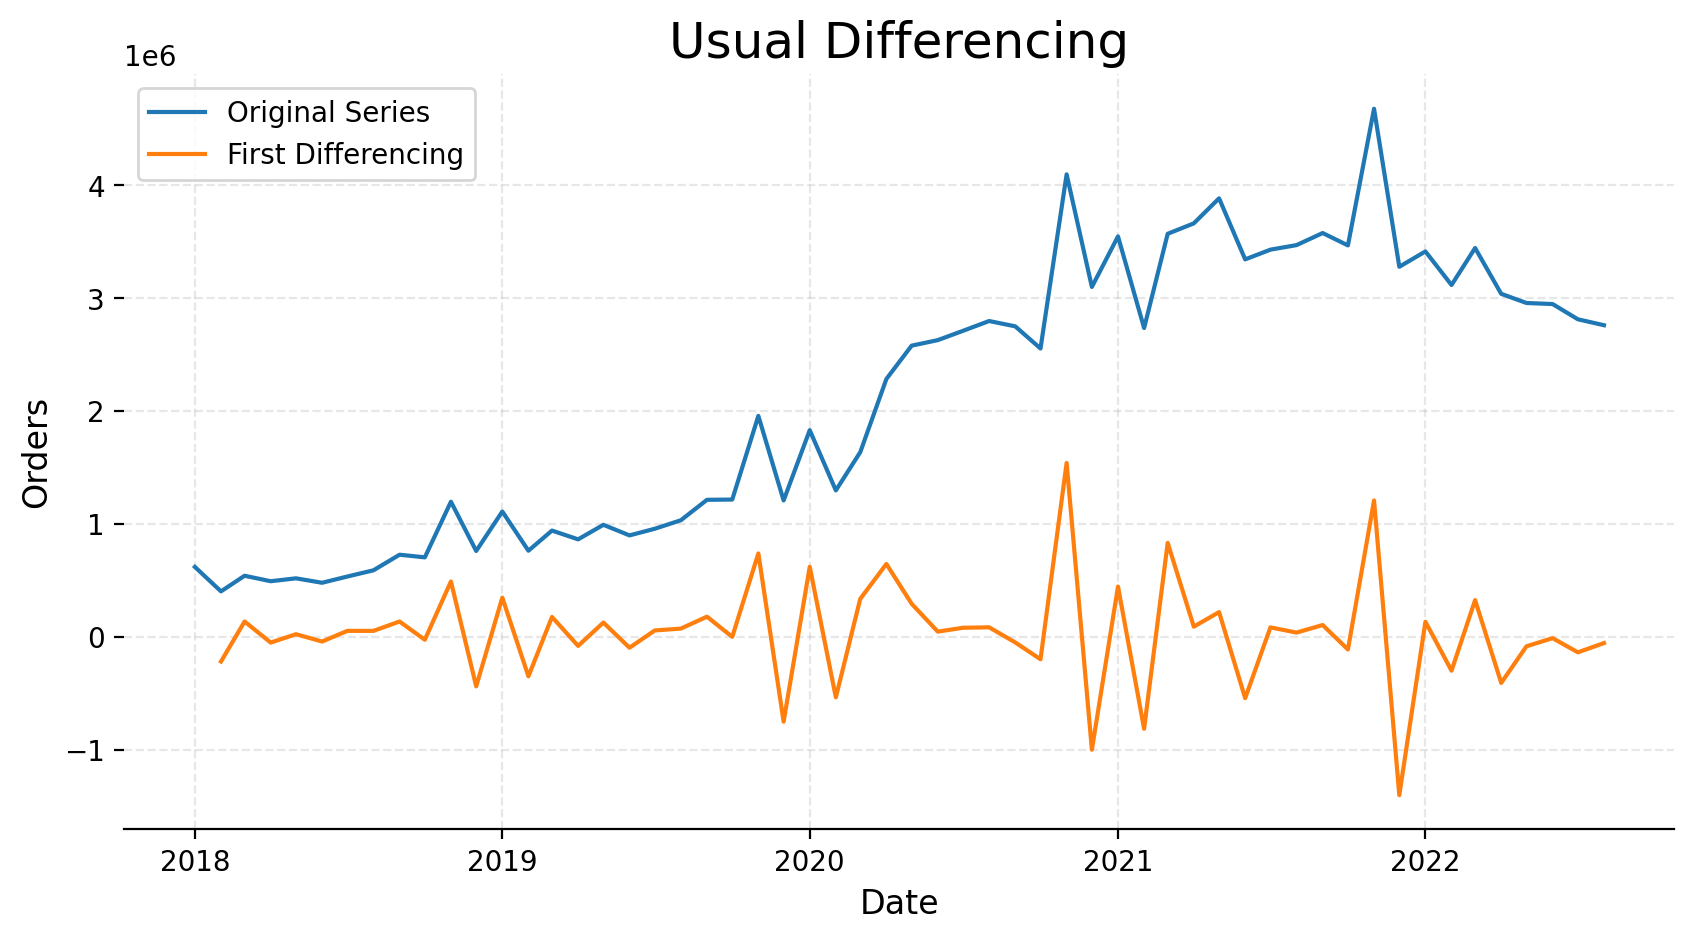

In [220]:
fig, ax = plt.subplots(1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
ax.plot(timeseries, label='Original Series')
ax.plot(timeseries.diff(1), label='First Differencing')
ax.set_title('Usual Differencing', fontsize=18)
ax.legend(loc='upper left', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
ax.grid(linestyle='--', alpha=0.3);

<hr style="height:3px">

# BOX-JENKINS Methodology

In [1153]:
# Try differences[12] to remove seazonal effects...

Timestamp('2019-09-01 00:00:00')

In [1164]:
# timeseries[timeseries.index <= timeseries.index[20]]

In [1194]:
def plot_series_acf_pacf(ts, compute_variance=False):

    fig, ax = plt.subplots(nrows=1, figsize=(10,4), dpi=100)

    # Usual Differencing
    ax.plot(ts, label='Series')
    ax.set_title('Series', fontsize=18)
    ax.legend(loc='upper left', fontsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Orders", fontsize=12)
    ax.grid(linestyle='--', alpha=0.3);

    
    if compute_variance == True:
        variance = list()

        for i in range(len(ts)):
            ts_now = ts[ts.index <= ts.index[i]]
            current_var = np.var(ts_now)
            variance.append(current_var)

        variance_ts = pd.Series(data=variance, index=timeseries.index)
        ax2 = ax.twinx()
        ax2.plot(variance_ts, 'orange', label='Variance', alpha=0.5)
        
        ax2.legend(loc='upper right', fontsize=10)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.set_xlabel("Date", fontsize=12)
        ax2.set_ylabel("Orders", fontsize=12)
        plt.fill_between(variance_ts.index, y1=variance_ts, y2=0, alpha=0.15, color='orange')

    
    fig, ax = plt.subplots(ncols=2, figsize=(10,2), dpi=100)
    plot_acf(ts, ax=ax[0])
    plot_pacf(ts, ax=ax[1])

    for i in [0,1]:
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['left'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid(linestyle='--', alpha=0.3);

    fig.tight_layout()

### 1) First Analysis

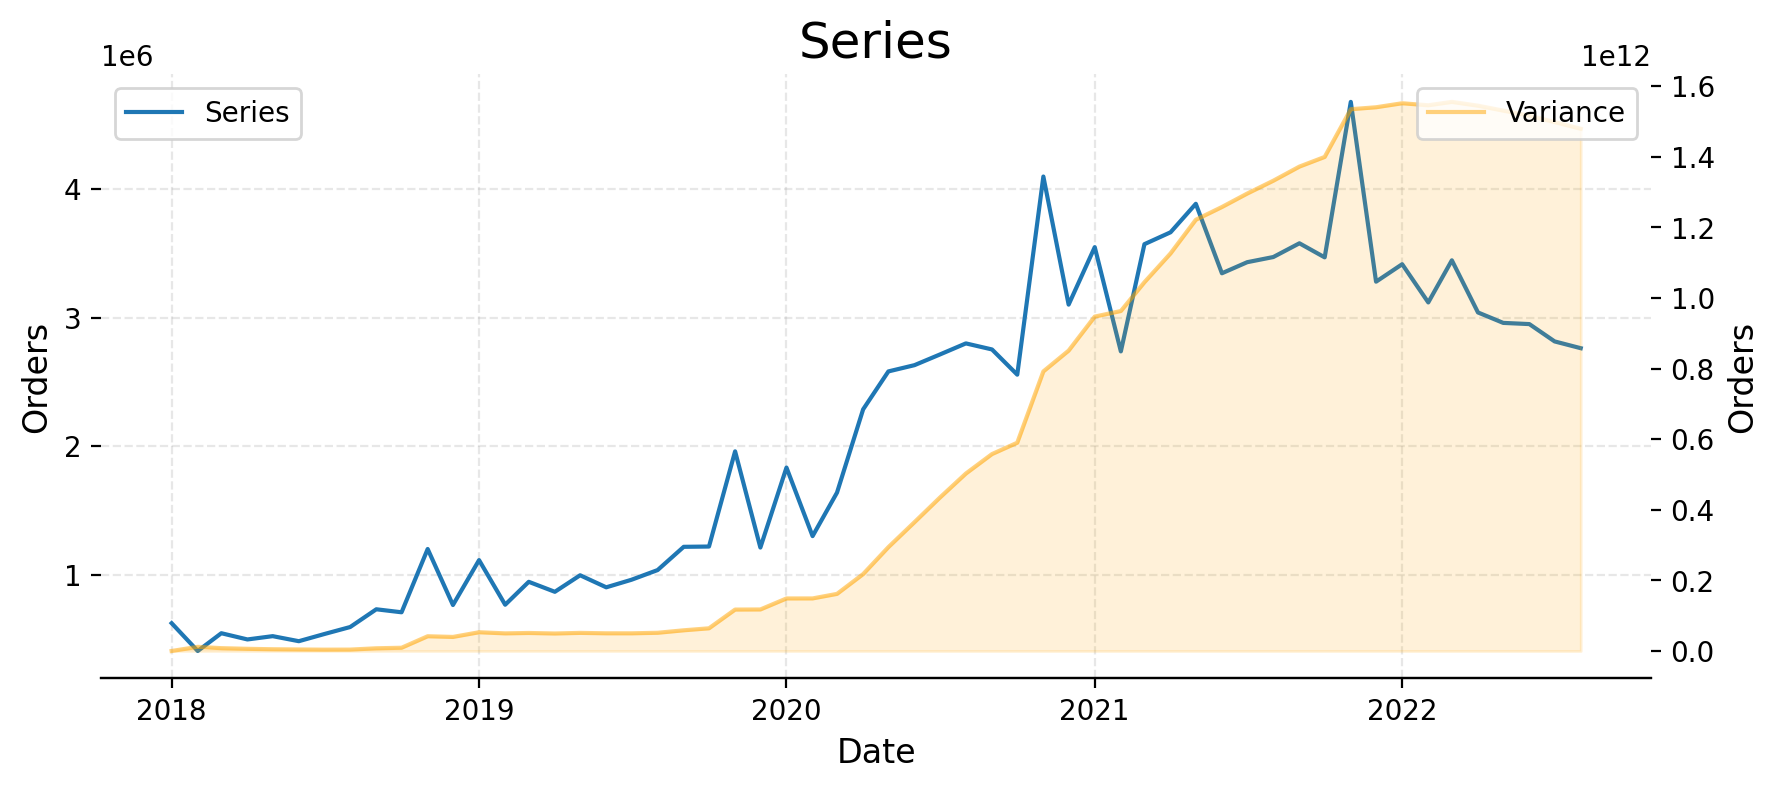

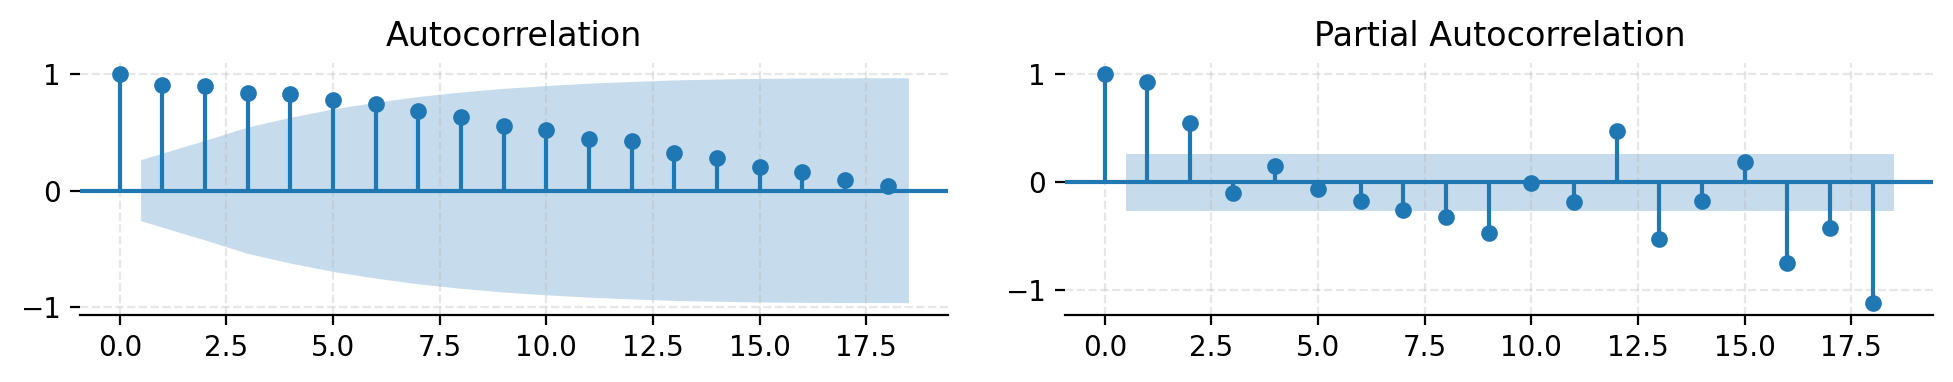

In [1195]:
plot_series_acf_pacf(timeseries, compute_variance=True)

#### There's a long correlation with the lags which takes too long to reduce. It implies in a non-stationary series. Let's take the first differences and see the results.

### 2) First Differences

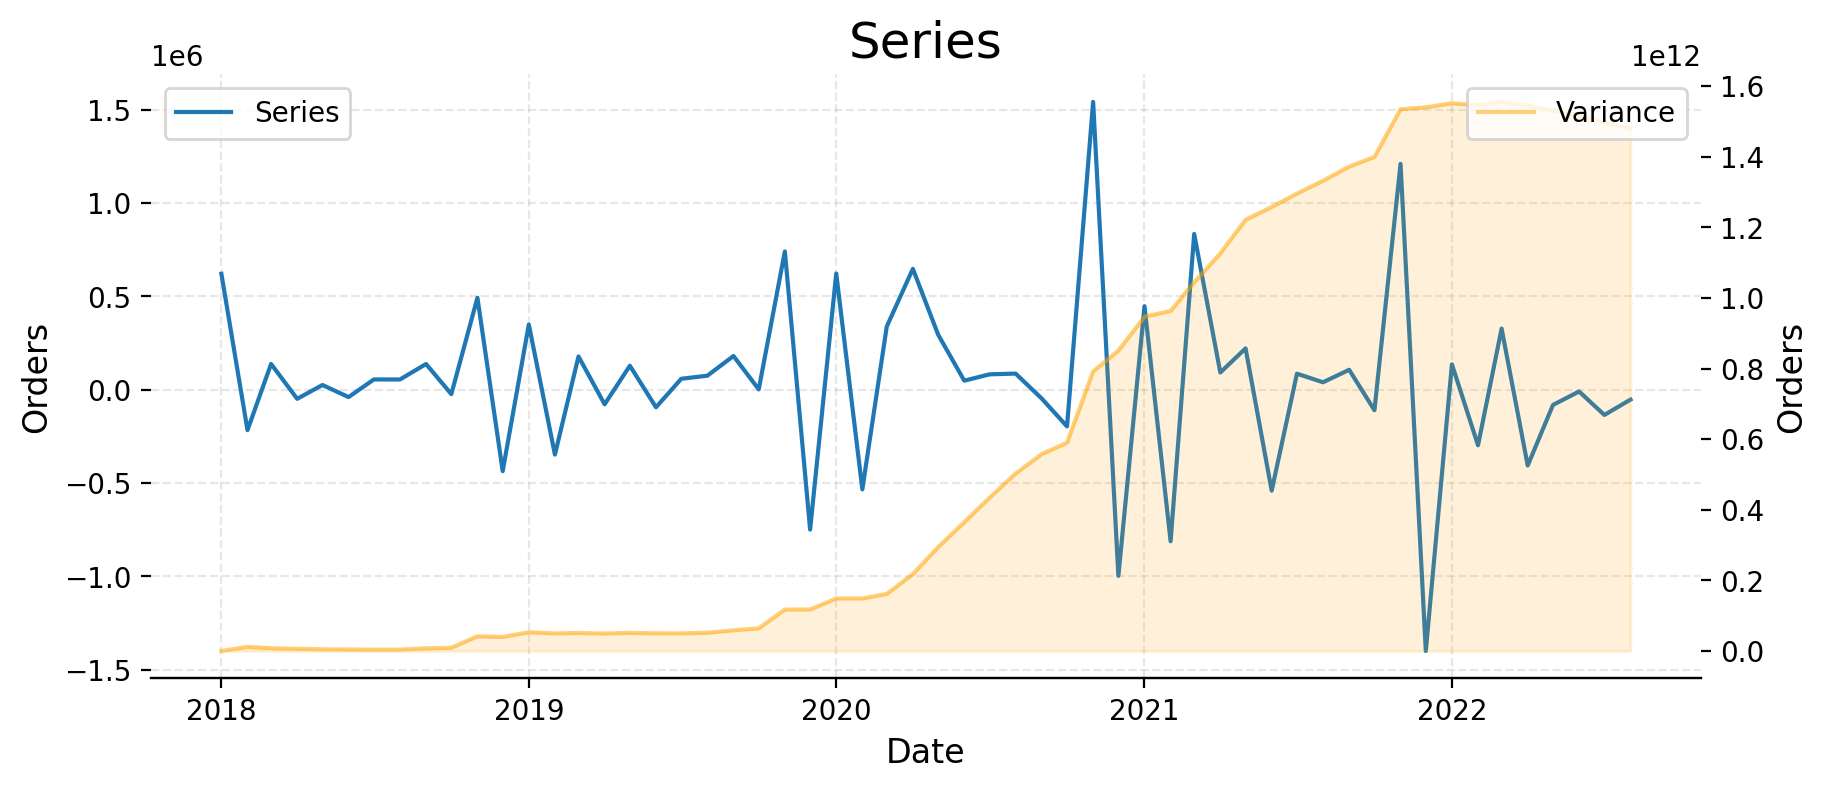

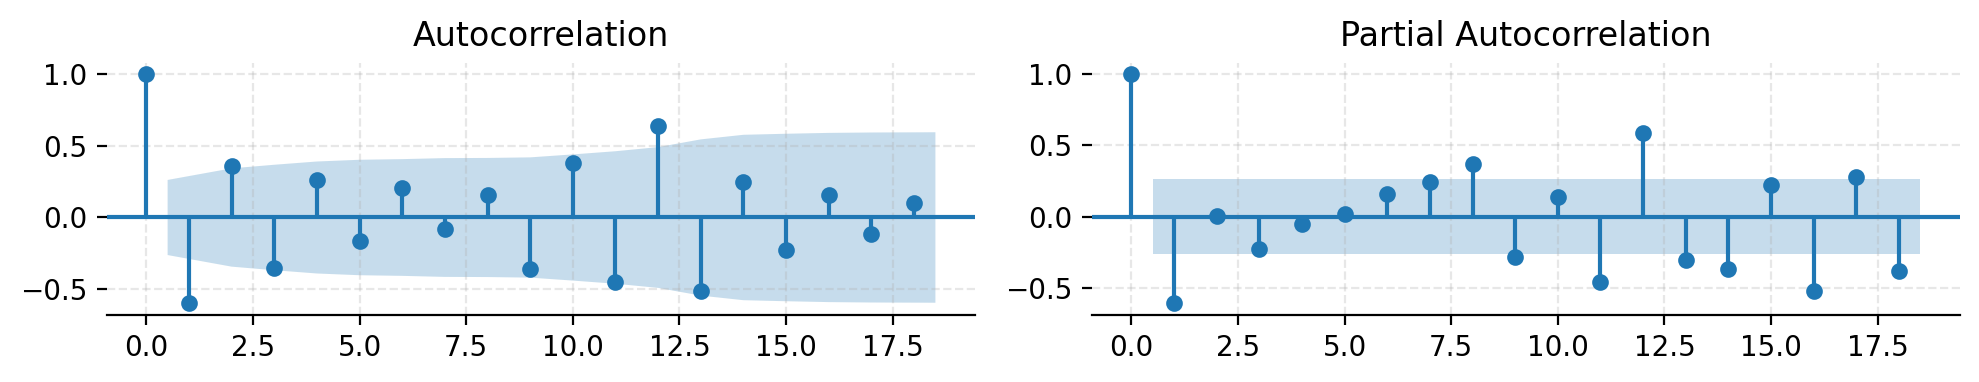

In [1196]:
# 1a differences to make it stationary
model = SARIMAX(timeseries,
                order=(0,1,0),
                seasonal_order=(0,0,0,12))

fitted_model = model.fit()
plot_series_acf_pacf(fitted_model.resid, compute_variance=True)

#### The residue isn't a White Noise yet. Let's continue the process.

### 3) Introducing AR(1)

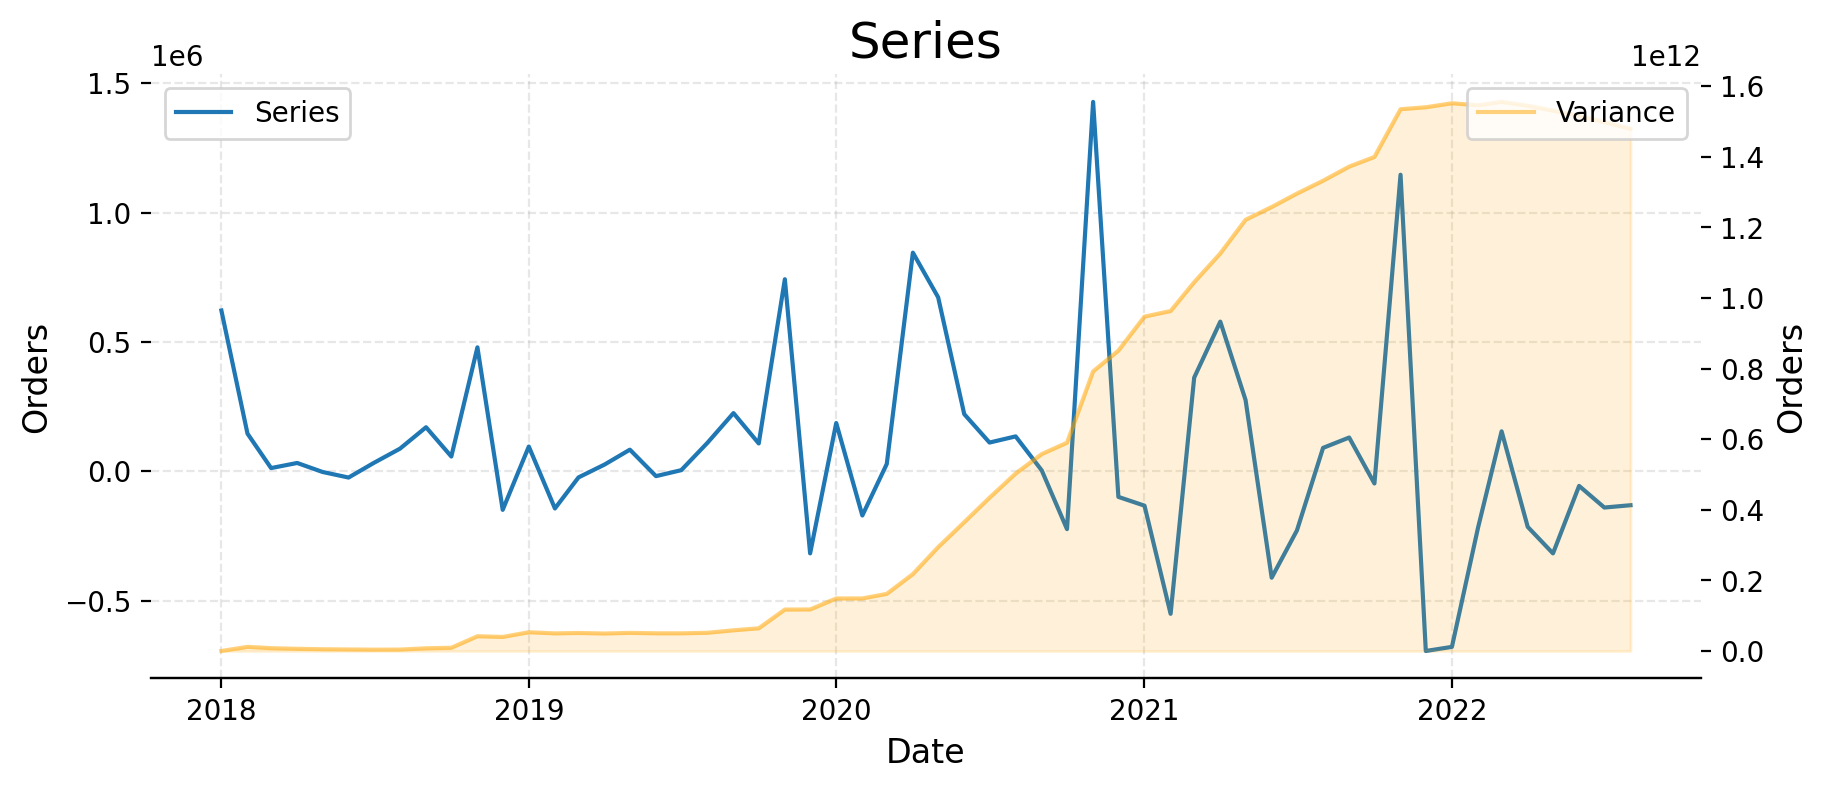

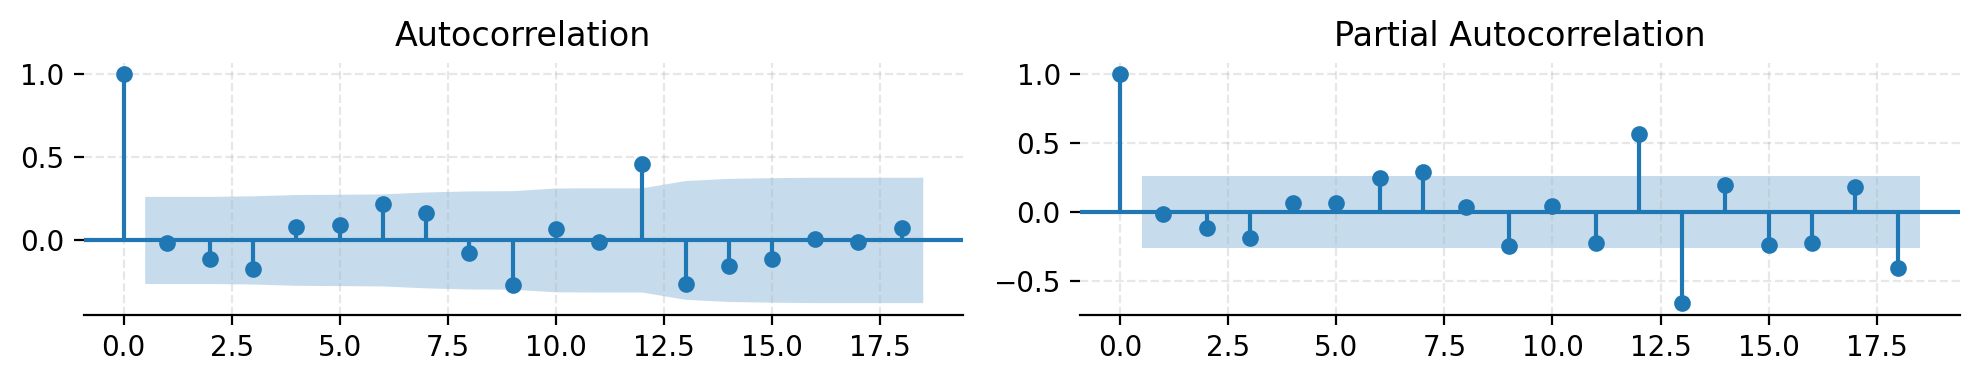

In [1197]:
# Adding AR(1)
model = SARIMAX(timeseries,
                order=(1,1,0),
                seasonal_order=(0,0,0,12))

fitted_model = model.fit()
plot_series_acf_pacf(fitted_model.resid, compute_variance=True)

#### We were able to remove the LAG[1] correlation, but there are still some issues

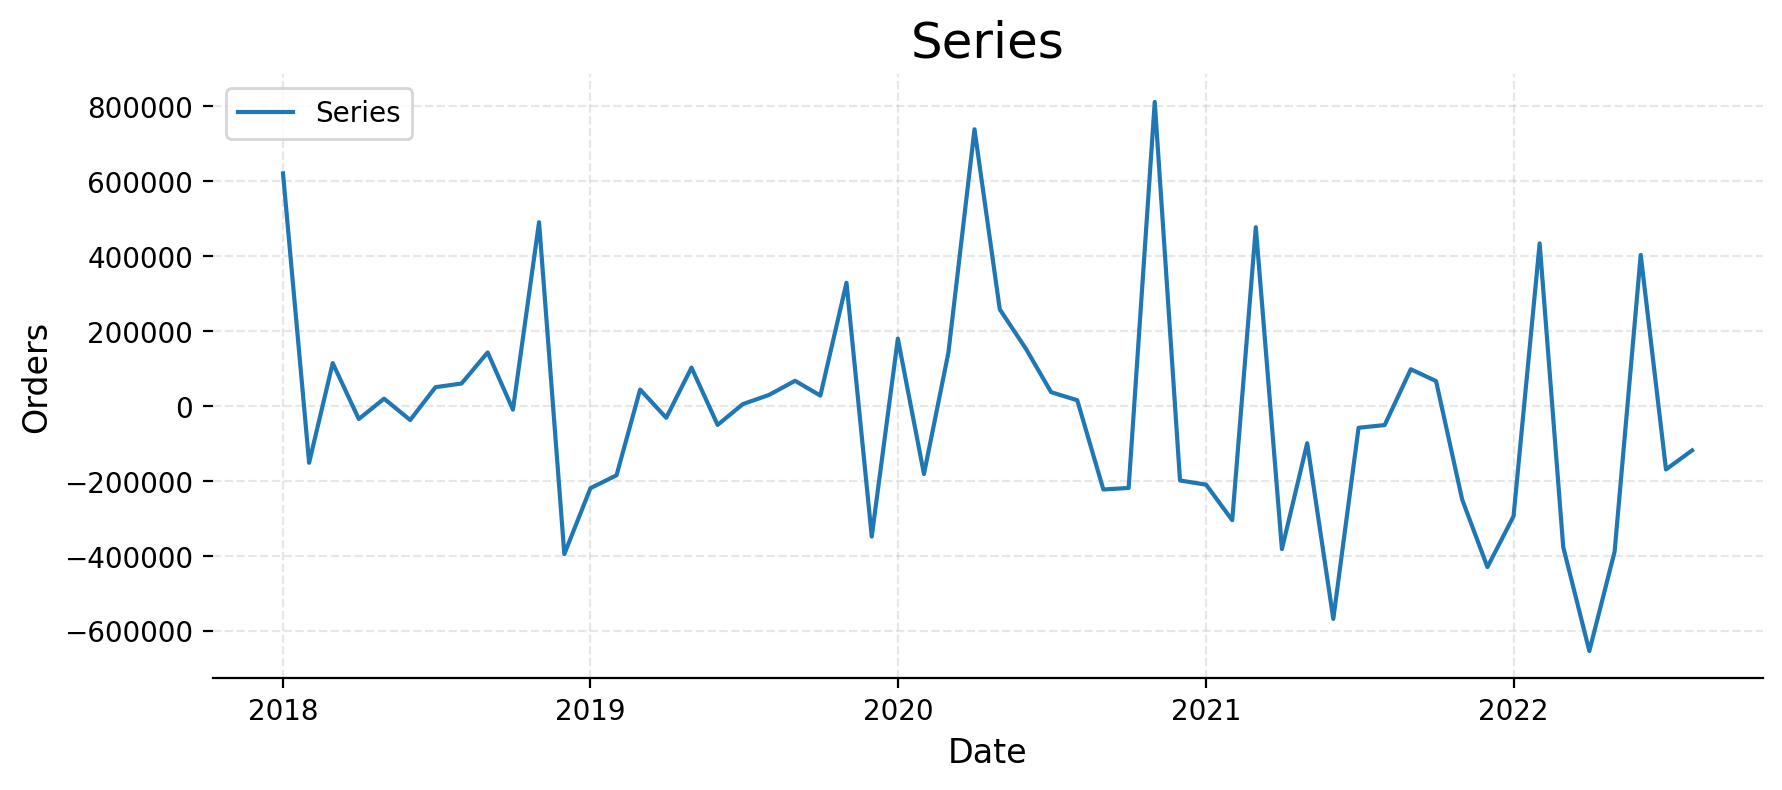

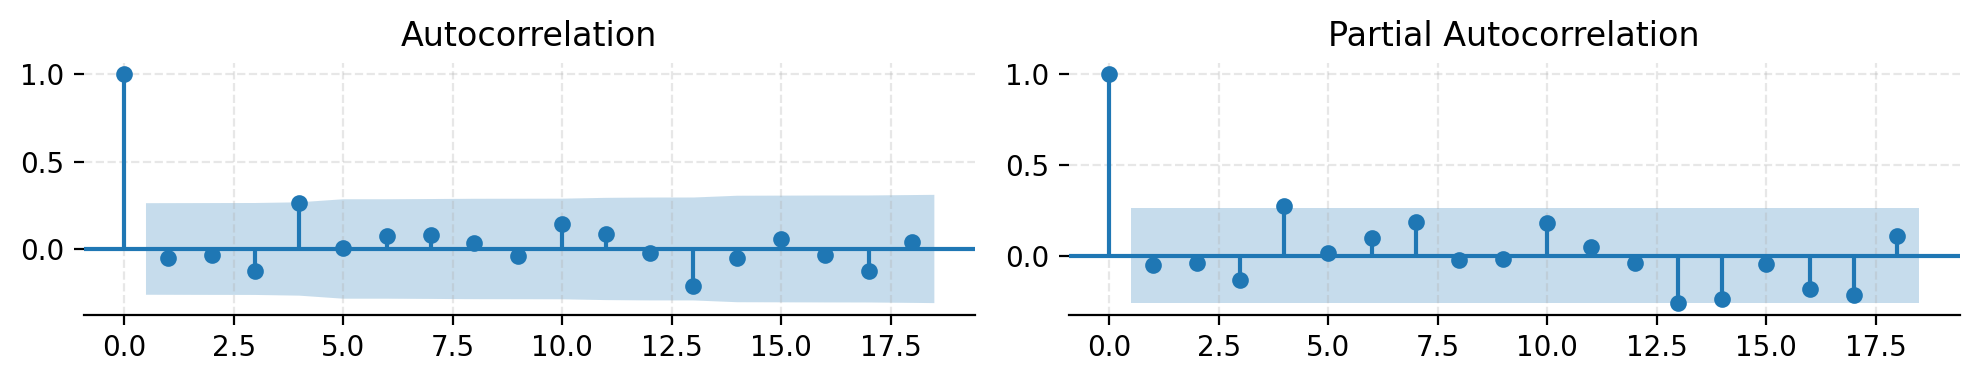

In [1140]:
# Adding AR(1)
model = SARIMAX(timeseries,
                order=(1,1,0),
                seasonal_order=(2,1,2,12))

fitted_model = model.fit()
plot_series_acf_pacf(fitted_model.resid)

<hr style="height:3px">

# IMPLEMENTING AUTO SARIMA

In [259]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [868]:
%%time

p_list = [0,1,2,3]
d_list = [0,1,2]
q_list = [0,1,2,3]
P_list = [0,1,2,3]
D_list = [0,1,2]
Q_list = [0,1,2,3]
S_list = [12]

AIC_dict = dict()

# GRID __________________________________________________________
for p in p_list:
    for d in d_list:
        for q in q_list:
            for P in P_list:
                for D in D_list:
                    for Q in Q_list:
                        for S in S_list:
                            my_order = (p, d, q)
                            my_seasonal_order = (P, D, Q, S)
                            
                            # Try it
                            try:
                                # Define model
                                model = SARIMAX(timeseries,
                                                order=my_order,
                                                seasonal_order=my_seasonal_order) 
                                
                                fitted_model = model.fit()
                                
                                # Gets the residual sum
                                RMSE = np.sqrt(fitted_model.mse) #(timeseries - fitted_model.forecasts[0])
                                
                                # Results
                                AIC_dict[my_order + my_seasonal_order] = fitted_model.aic, RMSE
                            
                            # In case that something goes wrong...
                            except:
                                AIC_dict[my_order + my_seasonal_order] = np.nan

Wall time: 25min 57s


In [869]:
df_results = pd.DataFrame.from_dict(AIC_dict, orient='index').reset_index().rename(columns={'index':'params',0:'AIC',1:'RMSE'})

In [898]:
df_results.sort_values('RMSE').head(5)

,params,AIC,RMSE
2076,"(3, 1, 3, 1, 0, 0, 12)",1563.970273,284861.904685
2107,"(3, 1, 3, 3, 1, 3, 12)",1232.508187,286329.673398
1531,"(2, 1, 3, 3, 1, 3, 12)",1230.538110,286451.948184
2059,"(3, 1, 2, 3, 1, 3, 12)",1229.920504,286460.041391
2047,"(3, 1, 2, 2, 1, 3, 12)",1227.933968,286474.497106


In [871]:
df_results.to_csv("/results/df_results3.csv", sep=';')

## Using the best parameters

In [872]:
# parameters = ((2, 1, 2), (1, 3, 1, 12))
parameters = ((3, 1, 3), (1, 0, 0, 12))

In [873]:
my_order = parameters[0]
my_seasonal_order = parameters[1]

In [874]:
model = SARIMAX(timeseries,
                order=my_order,
                seasonal_order=my_seasonal_order) 

In [875]:
fitted_model = model.fit()

In [876]:
fitted_model.aic

1563.970273486455

In [877]:
fitted_model.resid.sum()

629919.1427249813

In [878]:
(timeseries - fitted_model.forecasts[0]).sum()

629919.1427249813

## Predicting

Each observation in a time series can be **forecast** using all previous observations. We call these fitted values and they are denoted by:

$\hat{y}_{t}|_{t-1} $

https://otexts.com/fpp2/residuals.html

In [879]:
#TODO: insert mean value level on residual error

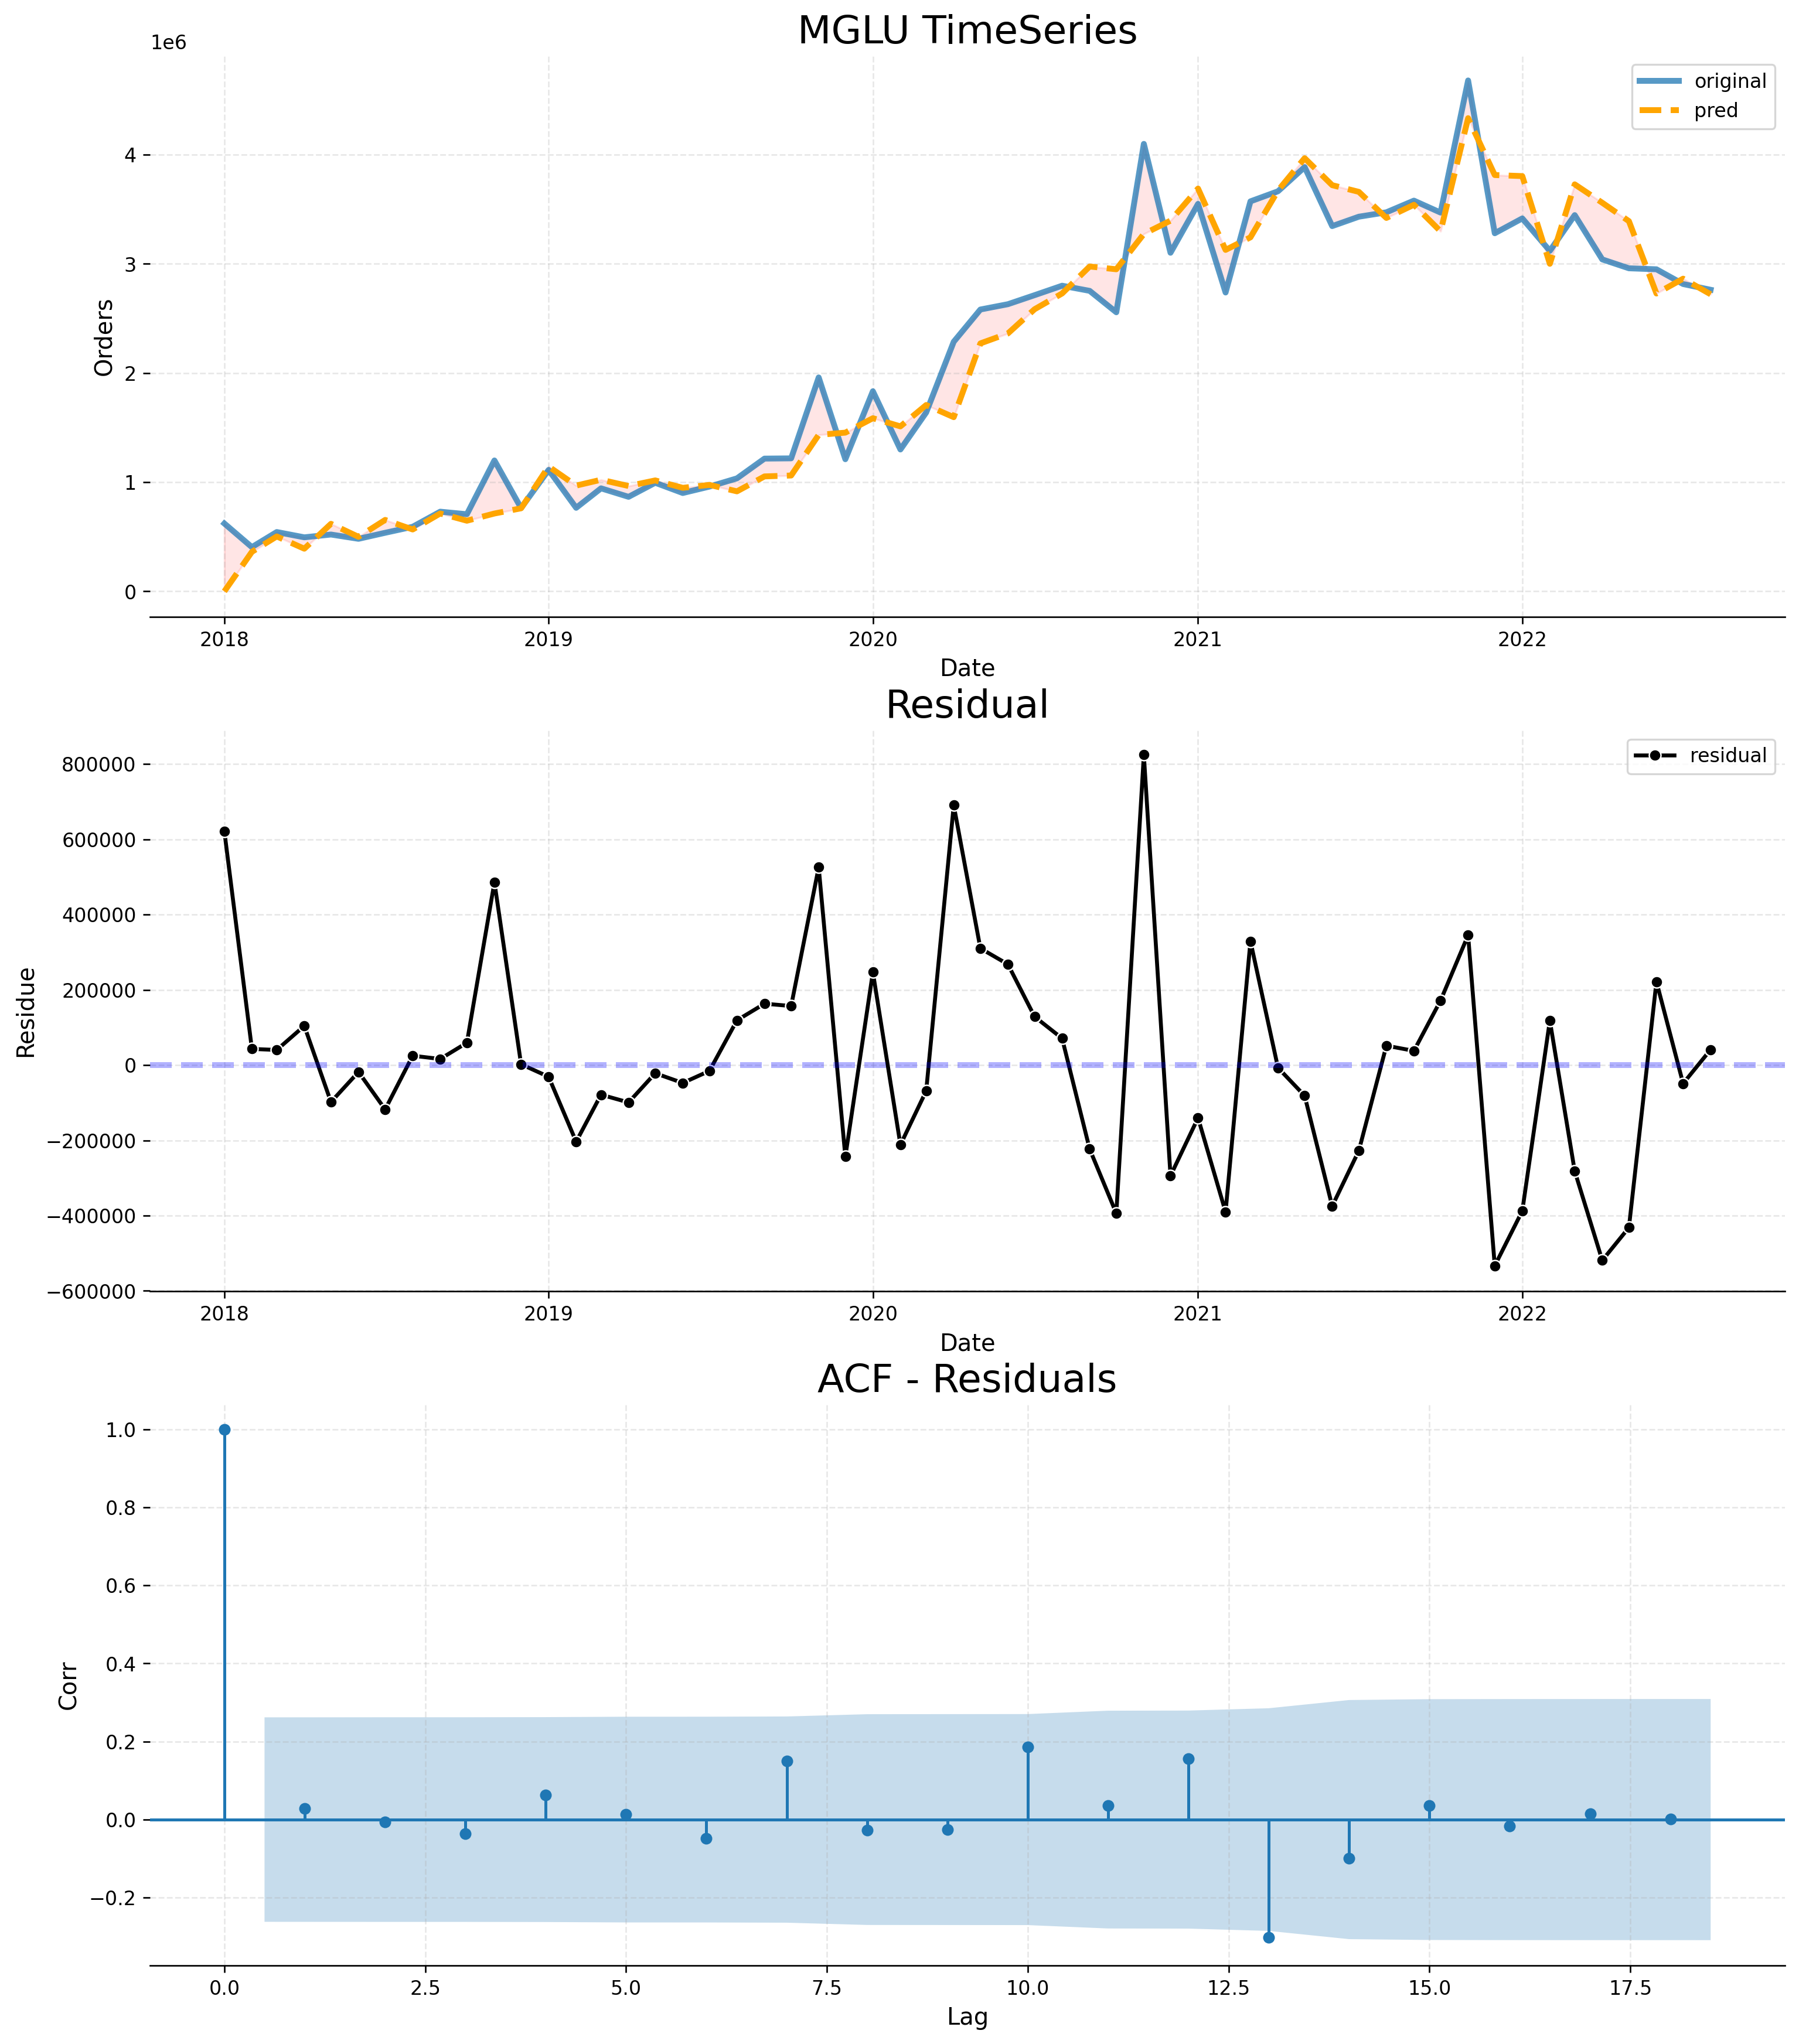

In [897]:
fig, ax = plt.subplots(nrows=3, figsize = (15,18))

fit = sm.tsa.STL(timeseries).fit()

original_ts = timeseries.copy()
predicted_ts = fitted_model.predict()
residuals = fitted_model.resid

# Axis 1_________________________
sns.lineplot(data=original_ts, label='original', ax=ax[0], linestyle='-', alpha=.75, linewidth=3);
sns.lineplot(data=predicted_ts, label="pred", ax=ax[0], linestyle='--', color='orange', linewidth=3);
ax[0].fill_between(timeseries.index, original_ts, predicted_ts, alpha=0.1, color='red')
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel("Date", fontsize=12)
ax[0].set_ylabel("Orders", fontsize=12)
ax[0].grid(linestyle='--', alpha=0.3);
ax[0].set_title("MGLU TimeSeries", fontsize=20)


# Axis 2_________________________
sns.lineplot(data=residuals, label="residual", ax=ax[1], linestyle='-', color='black', marker='o', linewidth=2);
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['top'].set_visible(False)

ax[1].axhline(y=0, color='blue', linestyle='--', alpha=0.3, linewidth=3)
ax[1].set_xlabel("Date", fontsize=12)
ax[1].set_ylabel("Residue", fontsize=12)
ax[1].grid(linestyle='--', alpha=0.3);
ax[1].set_title("Residual", fontsize=20);


plot_acf(residuals, ax[2])
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set_xlabel("Lag", fontsize=12)
ax[2].set_ylabel("Corr", fontsize=12)
ax[2].grid(linestyle='--', alpha=0.3);
ax[2].set_title("ACF - Residuals", fontsize=20);

# Train & Test Split

In [1080]:
from datetime import datetime, timedelta

In [1081]:
parameters = ((3, 1, 3), (1, 0, 0, 12))
PERIODS_TO_PREDICT = 10

my_order = parameters[0]
my_seasonal_order = parameters[1]

train = timeseries[:-PERIODS_TO_PREDICT]
test = timeseries[-PERIODS_TO_PREDICT:]

# Generating the Model
model = SARIMAX(train,
                order=my_order,
                seasonal_order=my_seasonal_order) 

# Fitting
fitted_model = model.fit()

In [1082]:
fitted_model.aic

1278.6366854659914

In [1083]:
# Prediction
START_PREDICTION = train.index[-1]
END_PREDICTION = pd.date_range(START_PREDICTION, periods=PERIODS_TO_PREDICT, freq='M')[-1]

prediction = fitted_model.predict(start=START_PREDICTION,end=END_PREDICTION,dynamic=True)

df_final = timeseries.reset_index()
df_prediction = prediction.reset_index().rename(columns={'index':'date'})
df_final = df_final.merge(df_prediction, how='left', on='date')

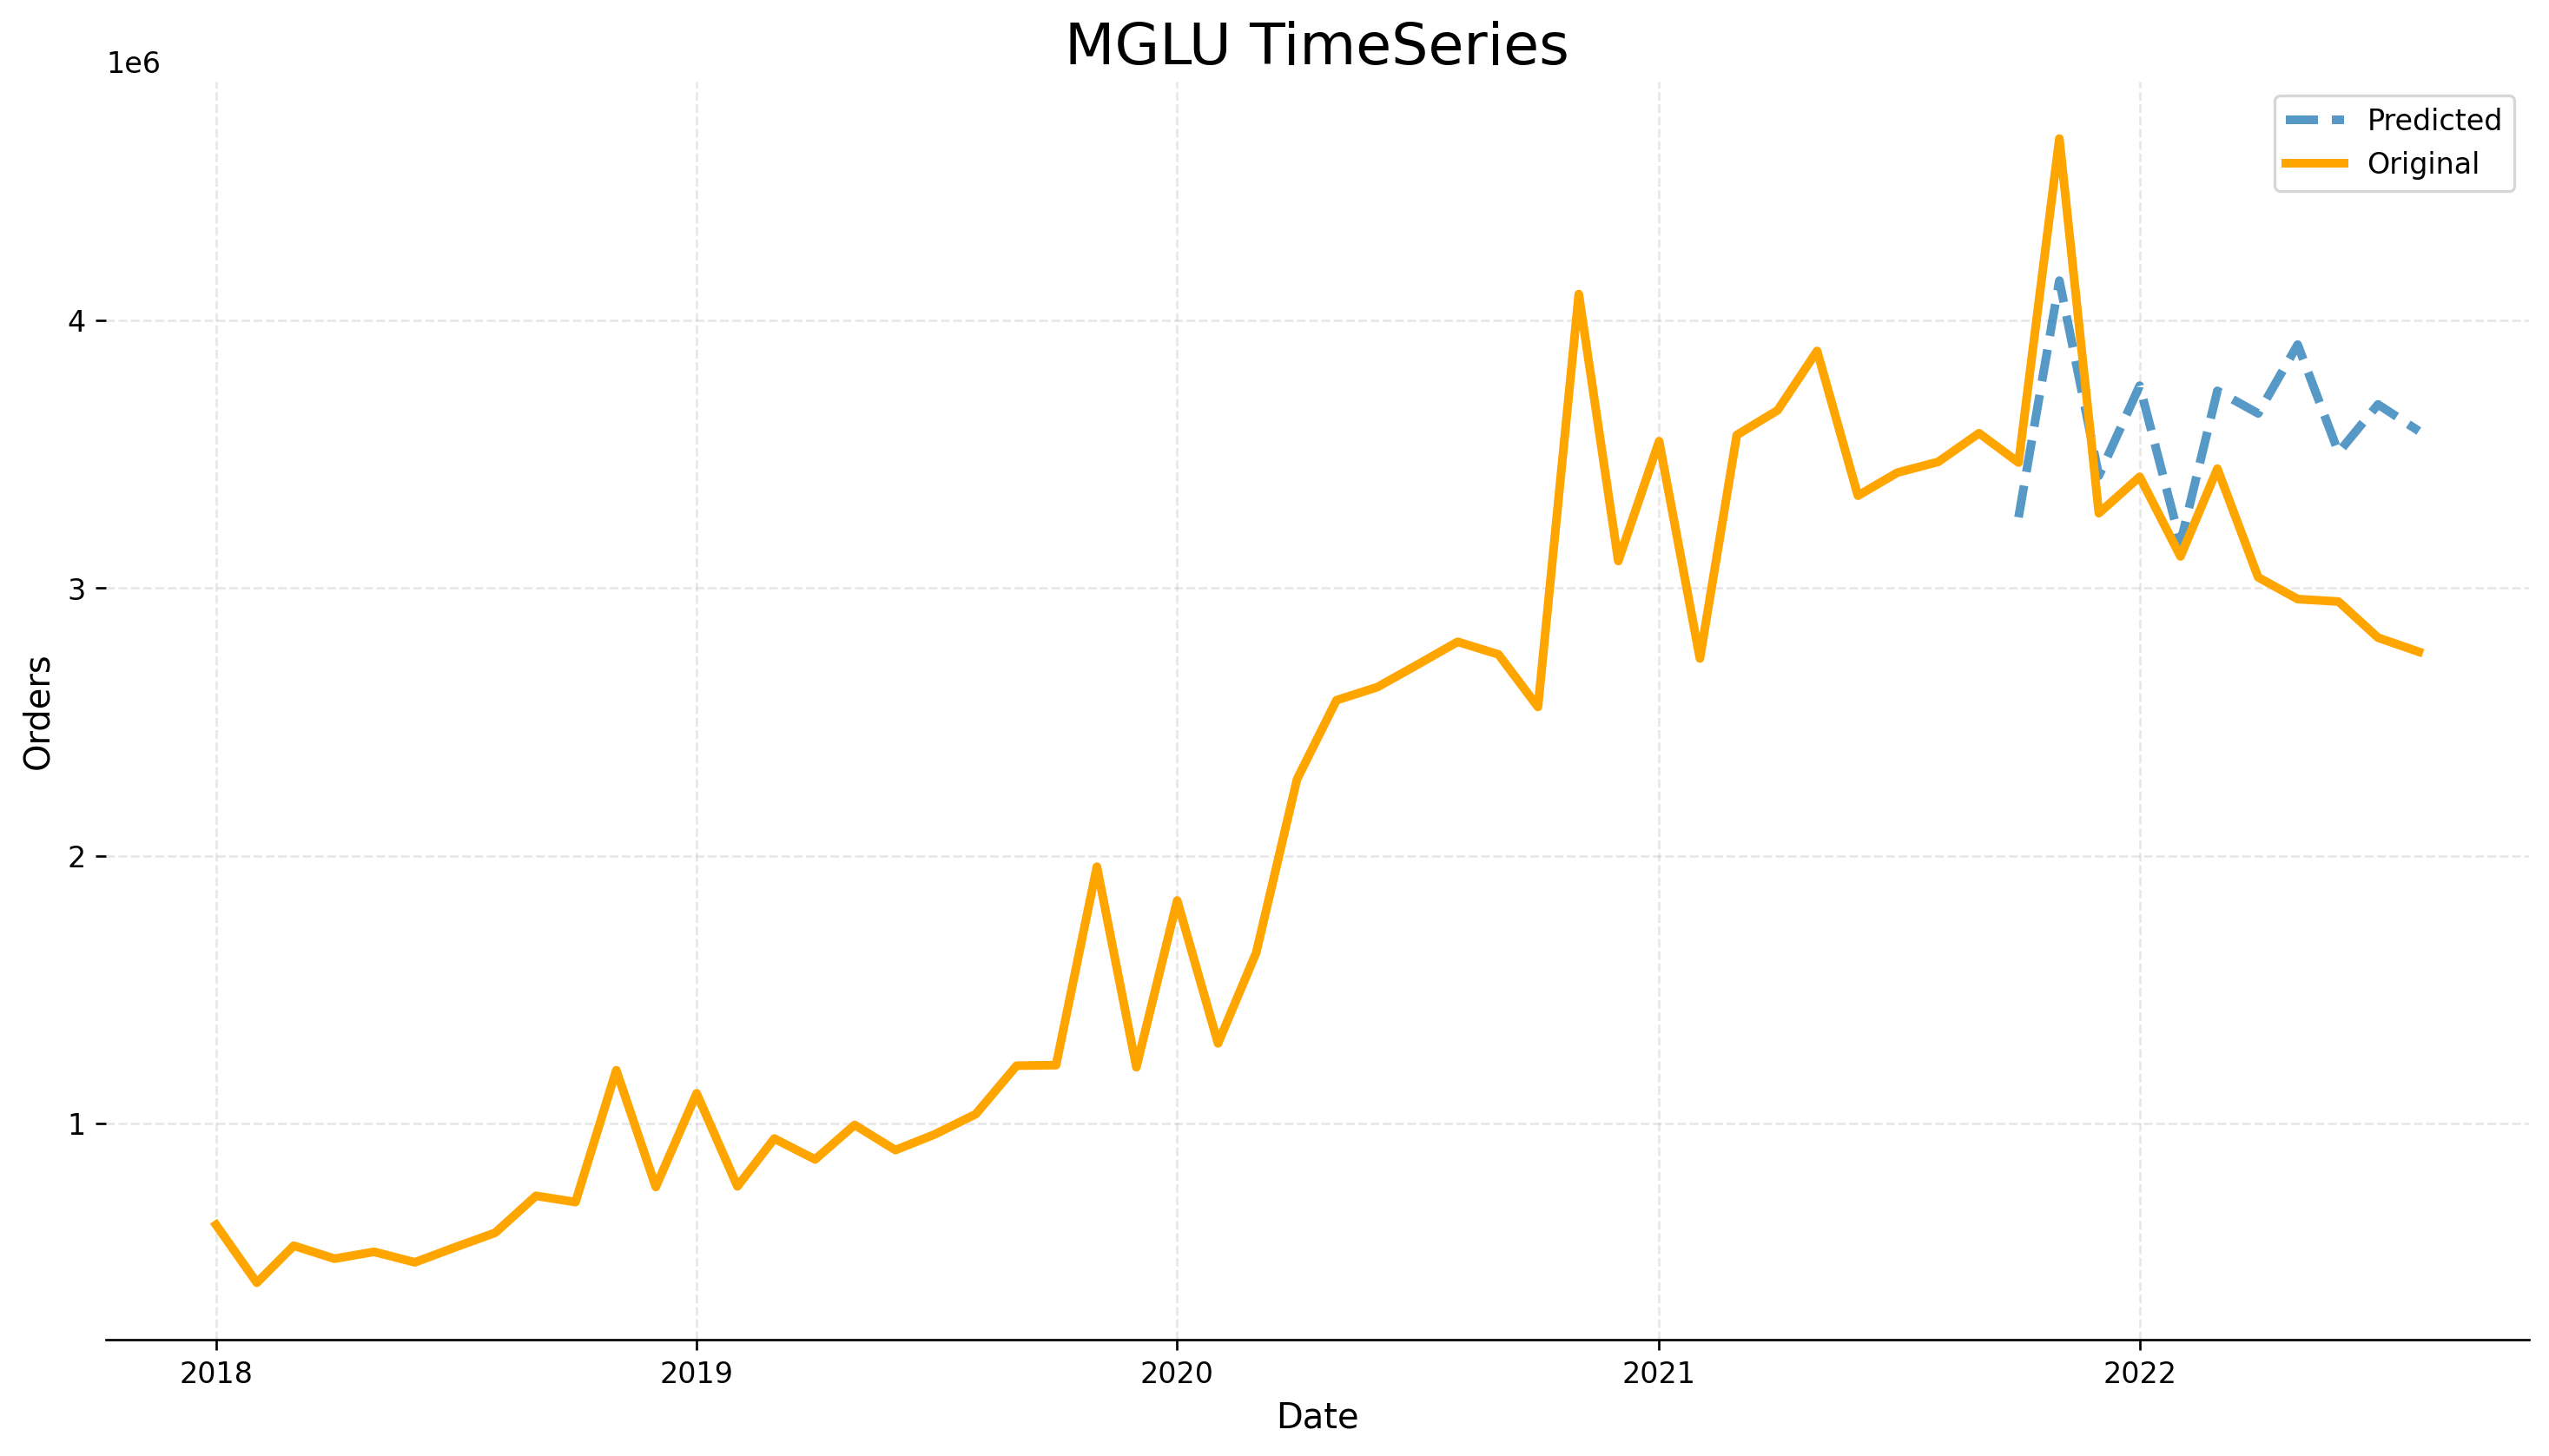

In [1084]:
fig, ax = plt.subplots(ncols=1, figsize = (15,8))

original_ts = train.copy()
predicted_ts = prediction
residuals = fitted_model.resid

plt.title("MGLU TimeSeries", fontsize=20)
sns.lineplot(data=df_final, x='date', y='predicted_mean',label='Predicted', ax=ax, linestyle='--', alpha=.75, linewidth=3);
sns.lineplot(data=df_final, x='date', y='orders',label="Original", ax=ax, linestyle='-', color='orange', linewidth=3);

# plt.fill_between(timeseries.index, original_ts, predicted_ts, alpha=0.1, color='red')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
ax.grid(linestyle='--', alpha=0.3);

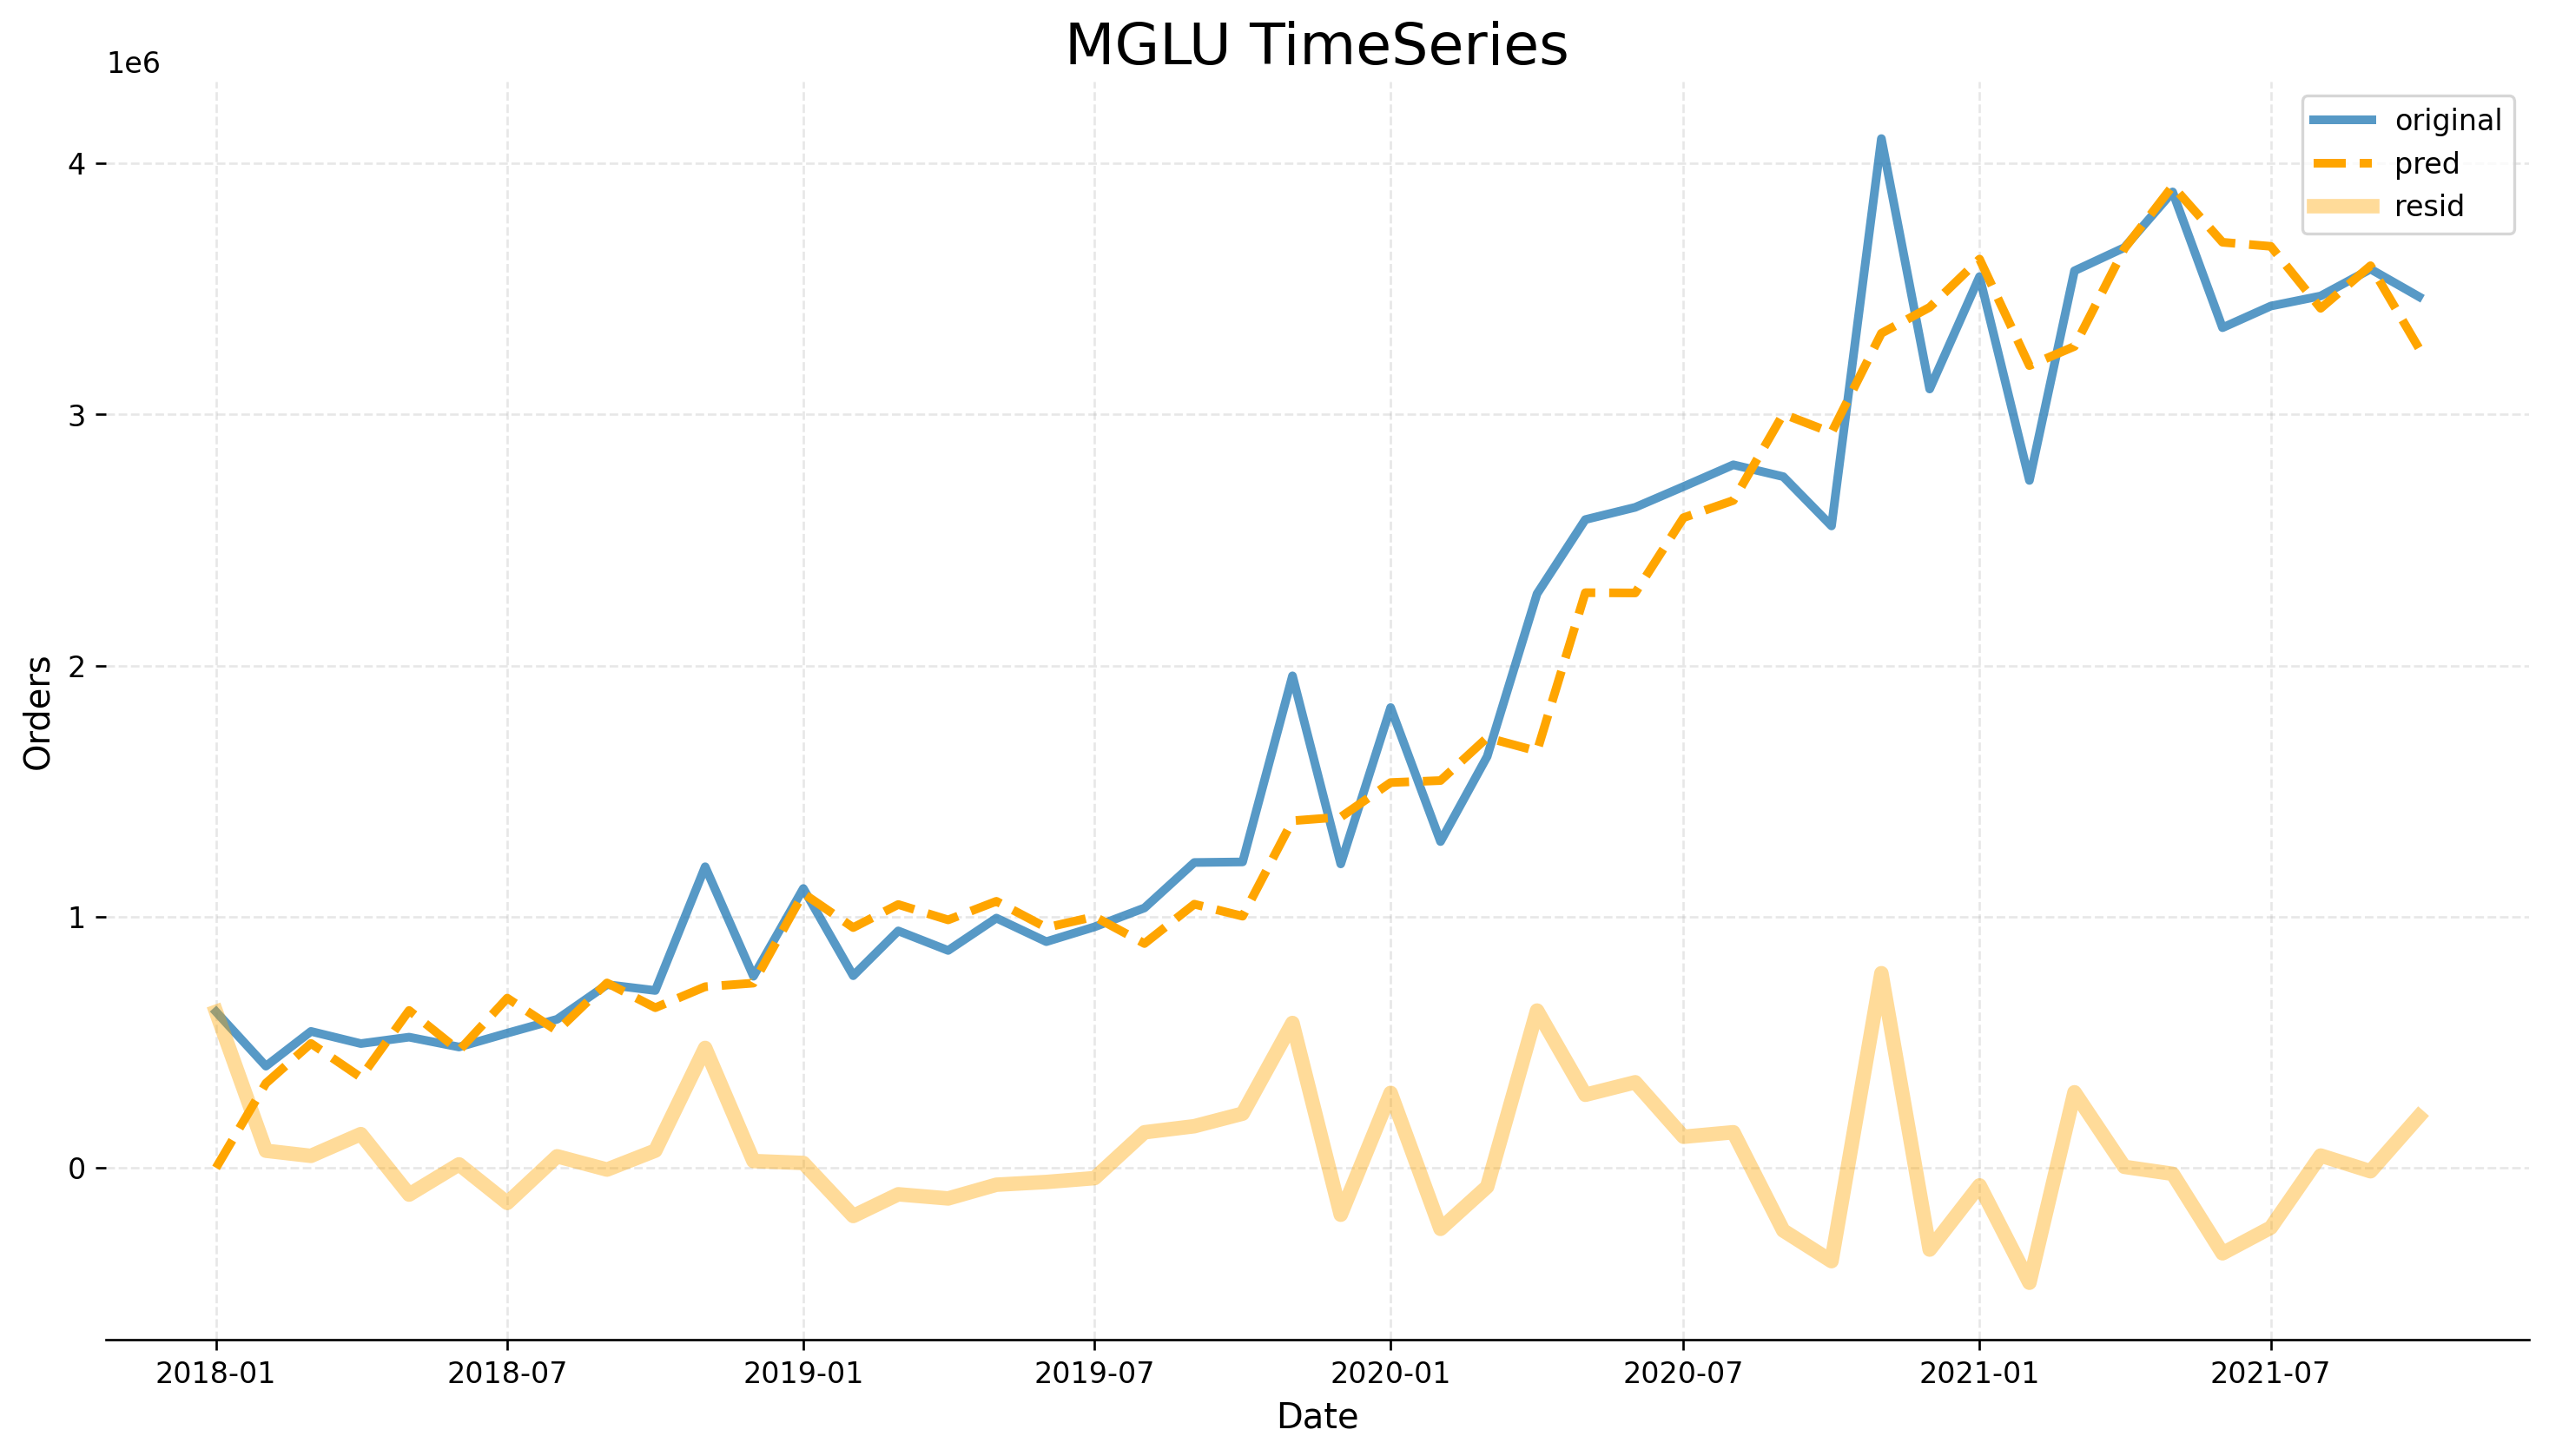

In [1013]:
fig, ax = plt.subplots(ncols=1, figsize = (15,8))

fit = sm.tsa.STL(timeseries).fit()

original_ts = train.copy()
predicted_ts = fitted_model.predict()
residuals = fitted_model.resid

plt.title("MGLU TimeSeries", fontsize=20)
sns.lineplot(data=original_ts, label='original', ax=ax, linestyle='-', alpha=.75, linewidth=3);
sns.lineplot(data=predicted_ts, label="pred", ax=ax, linestyle='--', color='orange', linewidth=3);
sns.lineplot(data=residuals, label="resid", ax=ax, linestyle='-', alpha=0.4, color='orange', linewidth=5);

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Orders", fontsize=12)
ax.grid(linestyle='--', alpha=0.3);

In [267]:
# help(SARIMAX)

In [ ]:
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(y=endogenous_variable,
                              x=exogenous_variable, #only required if exog data is used
                              seasonal=True,
                              m=7, #seasonality
                              information_criterion="aic",
                              trace=True)

# ARIMA

The purpose of differencing it to make the time series stationary

In [151]:
from statsmodels.tsa.arima_model import ARIMA

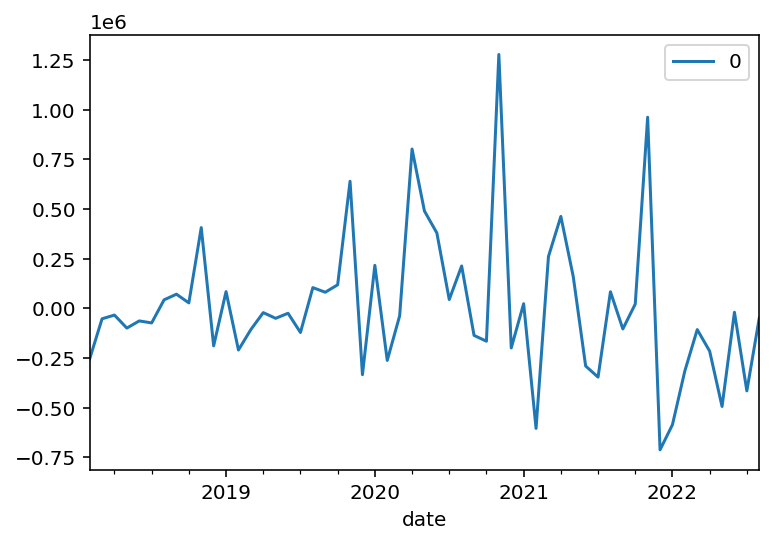

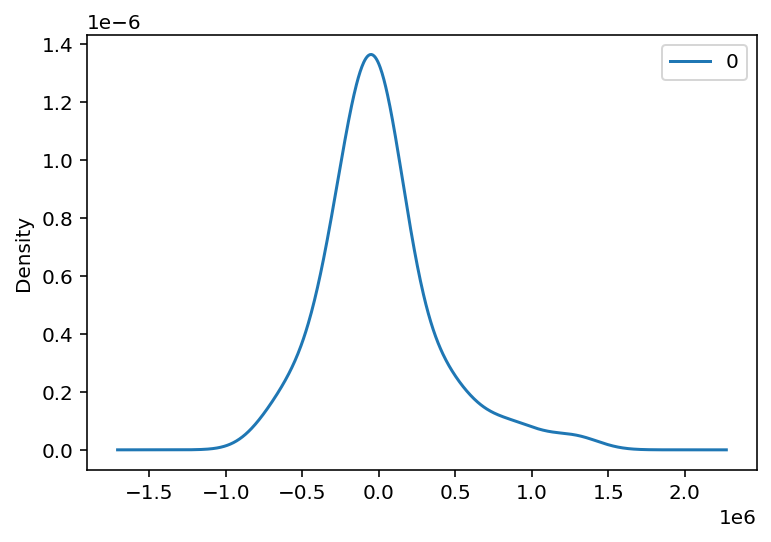

                  0
count  5.500000e+01
mean   4.643263e+03
std    3.621721e+05
min   -7.124195e+05
25%   -1.945441e+05
50%   -3.803615e+04
75%    9.379944e+04
max    1.277048e+06


In [168]:
# fit model
model = ARIMA(timeseries, order=(2,1,2))
model_fit = model.fit(disp=0)

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

In [169]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.orders   No. Observations:                   55
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -782.116
Method:                       css-mle   S.D. of innovations         353595.708
Date:                Sun, 06 Nov 2022   AIC                           1576.231
Time:                        22:47:22   BIC                           1588.275
Sample:                    02-01-2018   HQIC                          1580.889
                         - 08-01-2022                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.892e+04        nan        nan        nan         nan         nan
ar.L1.D.orders    -1.1188        nan        nan        nan         nan         nan
ar.L2.D.orders    -0.1188        nan

In [177]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [179]:
best_model = SARIMAX(timeseries, order=(2, 1, 2), seasonal_order=(2, 1, 2, 12)).fit(dis=-1)

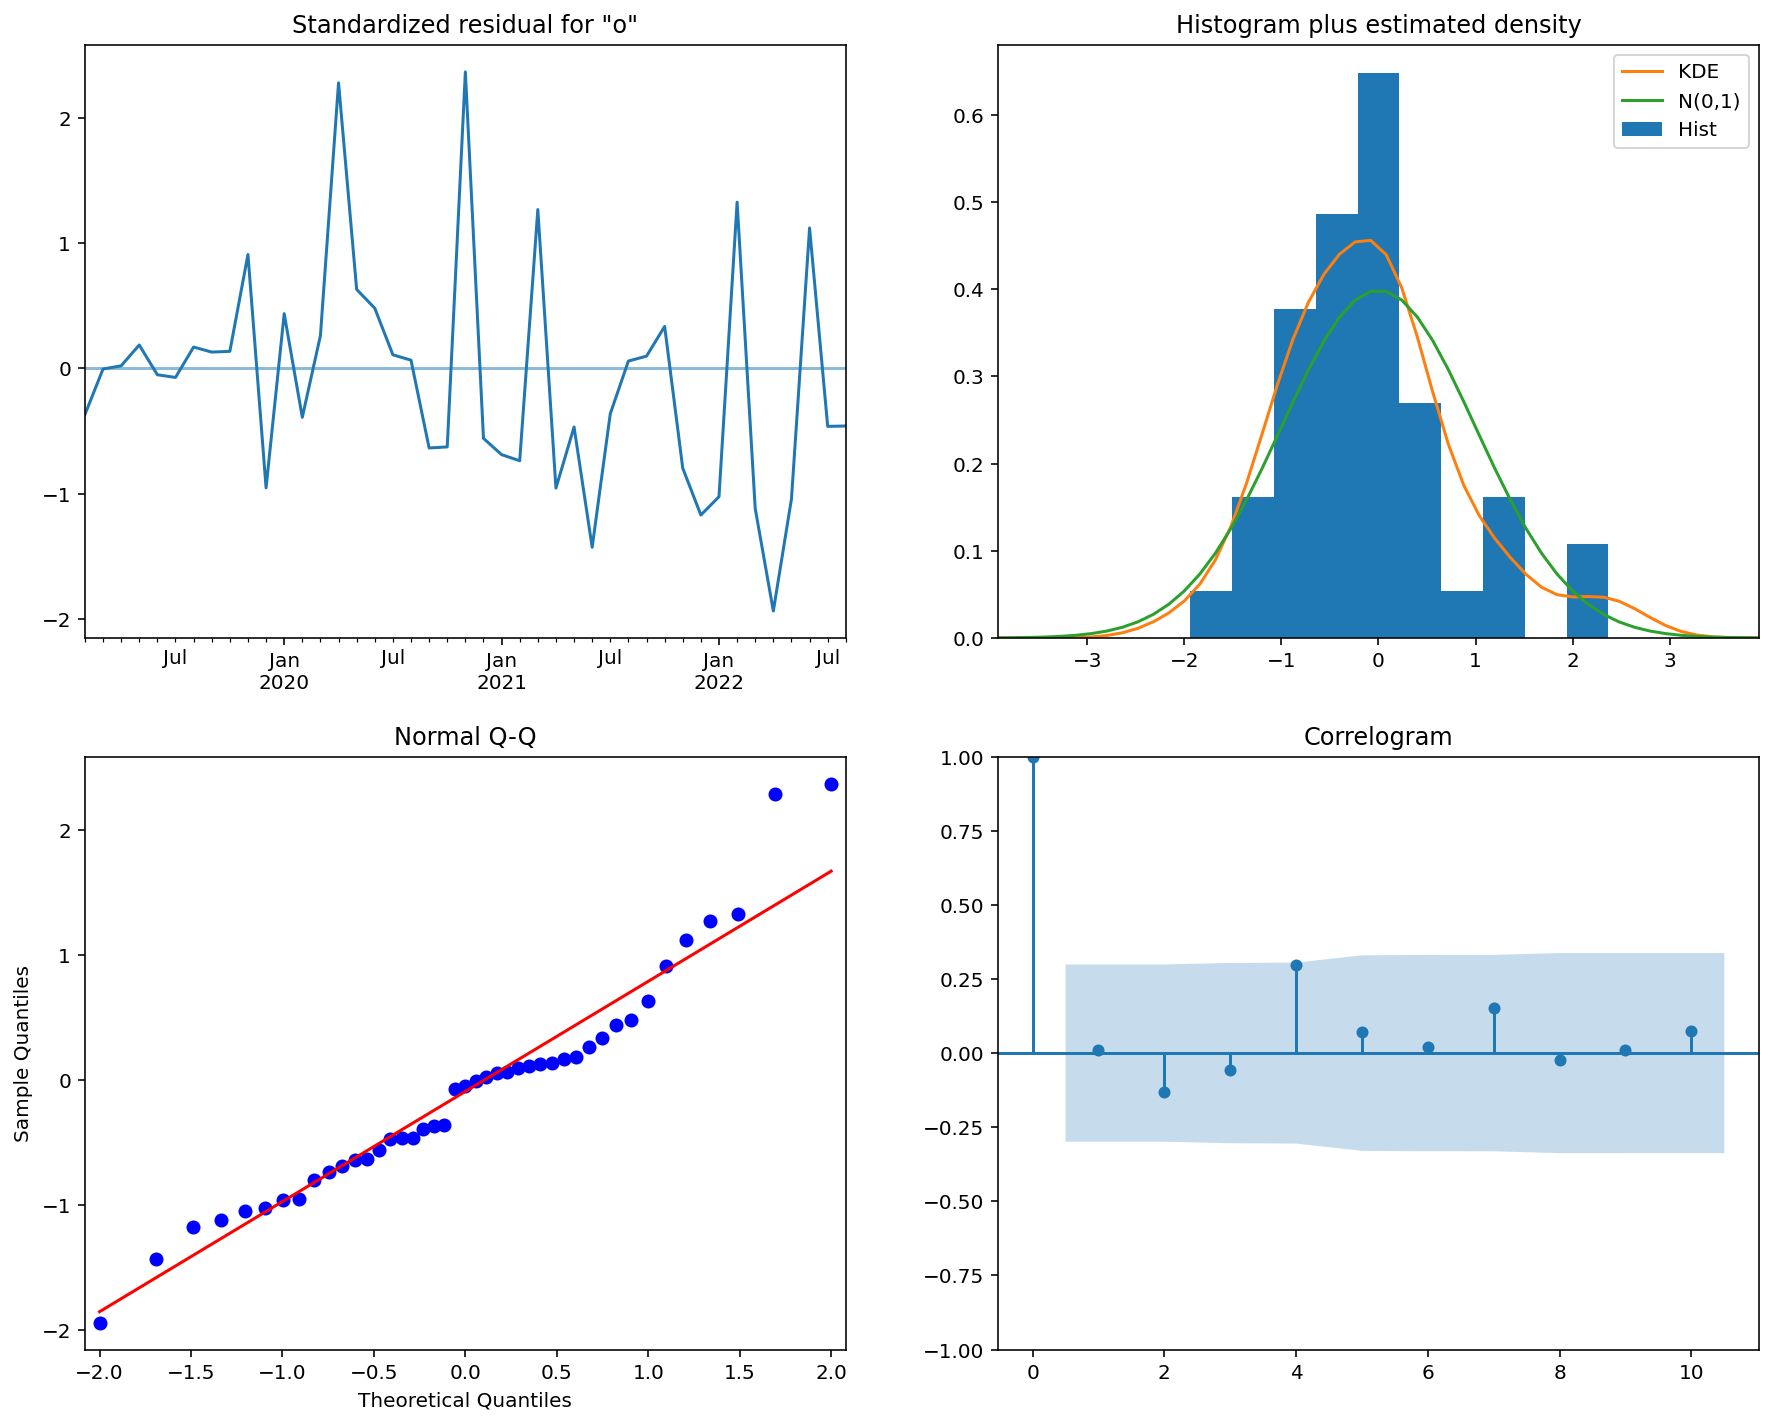

In [182]:
best_model.plot_diagnostics(figsize=(15,12));

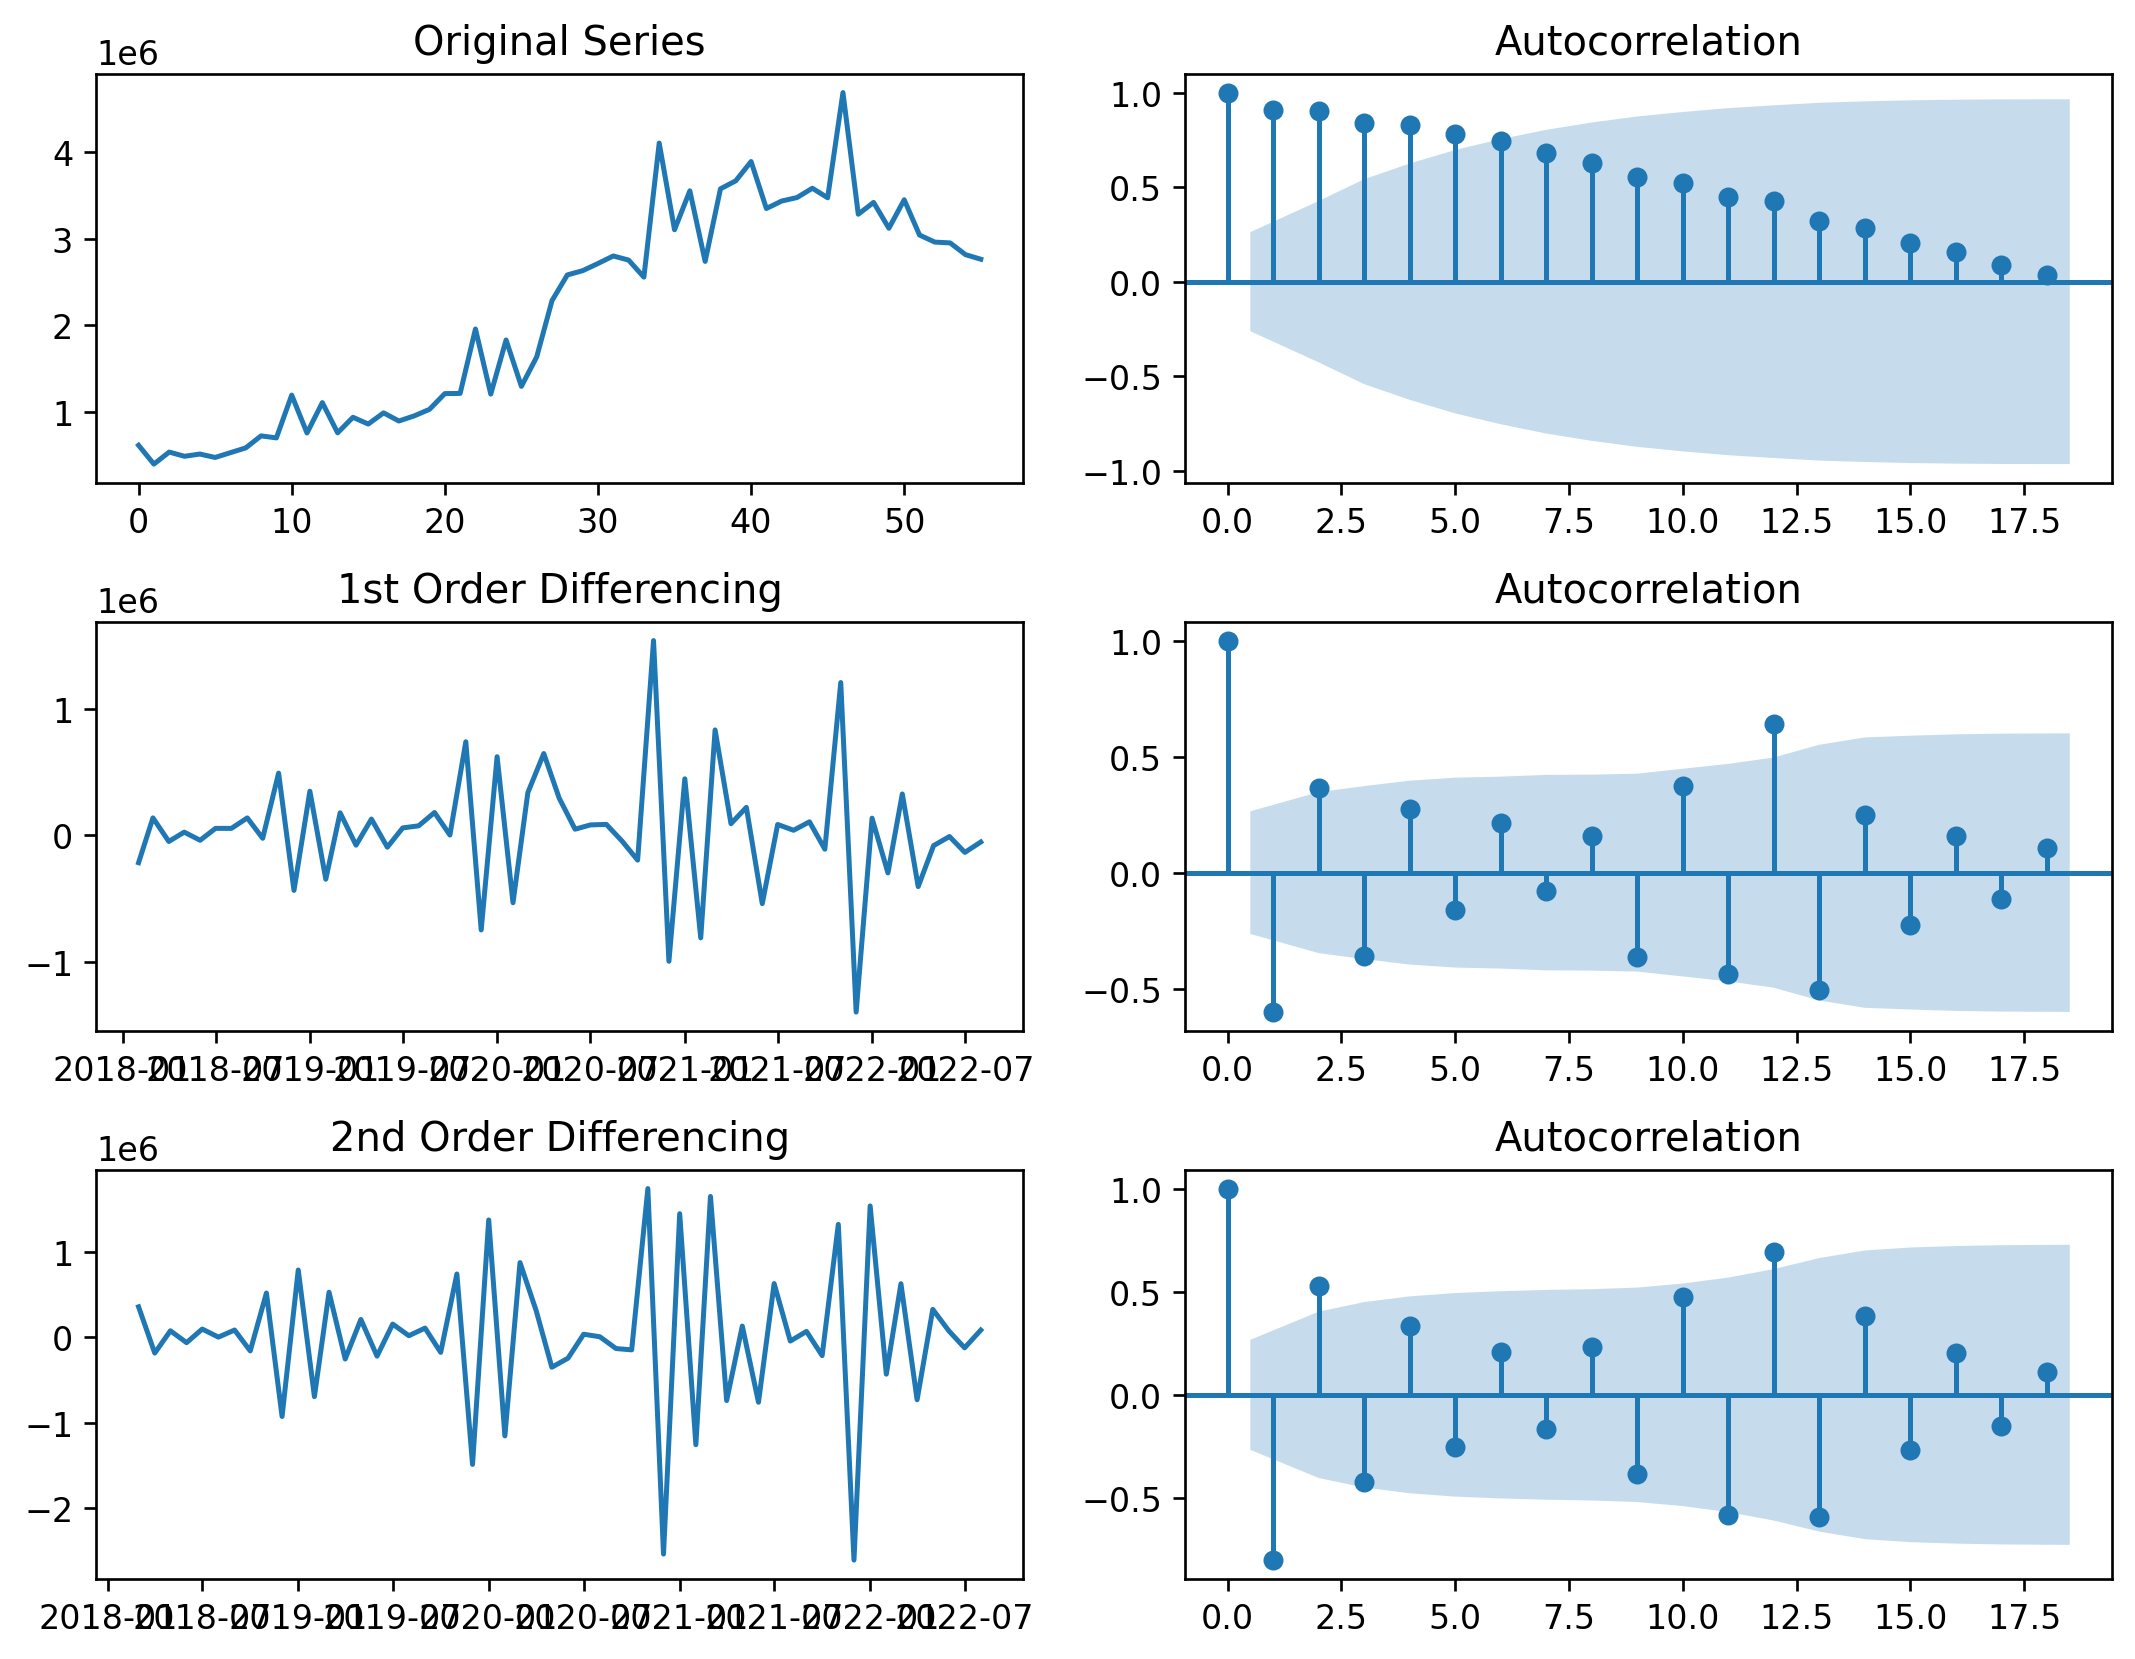

In [197]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(timeseries.values); axes[0, 0].set_title('Original Series')
plot_acf(timeseries.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(timeseries.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(timeseries.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(timeseries.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(timeseries.diff().diff().dropna(), ax=axes[2, 1])

plt.tight_layout()
plt.show()